* * *
* * * 
<h1 align="center">Calibration scheme for Niton XL5 Plus pXRF; following repair of CPU in November, 2022</h1>

* * * 
* * *

<center><b> Eliel Anttila</b>

<center><i>UC Santa Barbara

<center>eanttila@ucsb.edu

* * * 

In [2]:


##Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import json
import requests
import pandas as pd
import seaborn as sbn
from scipy import stats
from sklearn.linear_model import LinearRegression
import statistics
import os

#Thanks to E. Knappe for help with loops!

* * * 
<h2><i> Import .csv summarizing the known elemental abundances of USGS shale standards. </h2>

<h2 align="center"> Standards are as follows: </h2>
   
    
    

| Standard      | Reference |
| ----------- | ----------- |
| MAG1     | Gladney, 1980       |
| SCO1   | Gladney,1980|
| SDC1  | Gladney, 1980|
| SDARL2   | Potts and Webb, 2020   |
| SDARM2  | Potts and Webb, 2020    |
    

    

    
 <center><i>.pdf's of references can be found in /INPUT_CSV directory.   


In [3]:
# Import standard data
USGS=pd.read_csv('INPUT_CSV/Standard Data/USGS_STAND.csv').fillna(0) 

* * *
<h2> <i> Import .csv's with measured elemental abundances of USGS standards by Niton XL5 Plus pXRF (post CPU replacement). </h2>
    
    All data compiled from analytical sessions after CPU replacement was completed by Thermo in November, 2022. These standard compilations are demarcated by the postscript_NEW. 
    
    Add all additional standard measurements from this instrument to these files, and follow extant file format for adding an additional standard type to the calibration framework.


In [7]:
MAG1=pd.read_csv('INPUT_CSV/Standard Data/MAG1_NEW.csv').fillna(0) #measurements
SCO1=pd.read_csv('INPUT_CSV/Standard Data/SCo_1_NEW.csv') .fillna(0)
SDC1=pd.read_csv('INPUT_CSV/Standard Data/SDC-1_NEW.csv').fillna(0)
SDARM2=pd.read_csv('INPUT_CSV/Standard Data/SDAR_M2NEW.csv').fillna(0)
SDARL2=pd.read_csv('INPUT_CSV/Standard Data/SDAR_L2NEW.csv').fillna(0)
SiO2=pd.read_csv('INPUT_CSV/Standard Data/SIO2.csv').fillna(0)


* * * 
<h2><i>Define list of elements to loop through.

In [8]:
listofelements = ['Ag','Al','As','Au','Ba','Bal','Bi','Ca','Cd','Cl','Co','Cr','Cu','Fe','Hf','Hg','K','Mg','Mn','Mo','Nb','Ni','P','Pb','Pd','Rb','Re','S','Sb','Se','Si','Sn','Sr','Ta','Th','Ti','U','V','W','Y','Zn','Zr']
listofelementerrors = ['Ag 2-Sigma','Al 2-Sigma','As 2-Sigma','Au 2-Sigma','Ba 2-Sigma','Bal 2-Sigma','Bi 2-Sigma','Ca 2-Sigma','Cd 2-Sigma','Cl 2-Sigma','Co 2-Sigma','Cr 2-Sigma','Cu 2-Sigma','Fe 2-Sigma','Hf 2-Sigma','Hg 2-Sigma','K 2-Sigma','Mg 2-Sigma','Mn 2-Sigma','Mo 2-Sigma','Nb 2-Sigma','Ni 2-Sigma','P 2-Sigma','Pb 2-Sigma','Pd 2-Sigma','Rb 2-Sigma','Re 2-Sigma','S 2-Sigma','Sb 2-Sigma','Se 2-Sigma','Si 2-Sigma','Sn 2-Sigma','Sr 2-Sigma','Ta 2-Sigma','Th 2-Sigma','Ti 2-Sigma','U 2-Sigma','V 2-Sigma','W 2-Sigma','Y 2-Sigma','Zn 2-Sigma','Zr 2-Sigma']

* * * 
<b><i>For each element:</b> plot known abundance vs. measured abundance. Fit a line to data, calculate coefficient of determination (r<sup>2</sup>) for the model, and plot line. 

<b><i>For each elemental uncertainty:</b> calculate standard deviation of elemental abundance measurements for each standard. The standard deviation of the dispersion of elemental abundance measurements for each element of each standard is calculated. The standard deviations for all standards are averaged for each element, yielding a mean standard deviation of analytical dispersion calculated for each element.  Calculating the 2-standard-deviation dispersion for each element is a more realistic approximation of the analytical uncertainty of the pXRF than the device's internal modeled analytical uncertainty, and takes into account variability associated with external environmental conditions, matrix effects, etc. 



Working on Ag


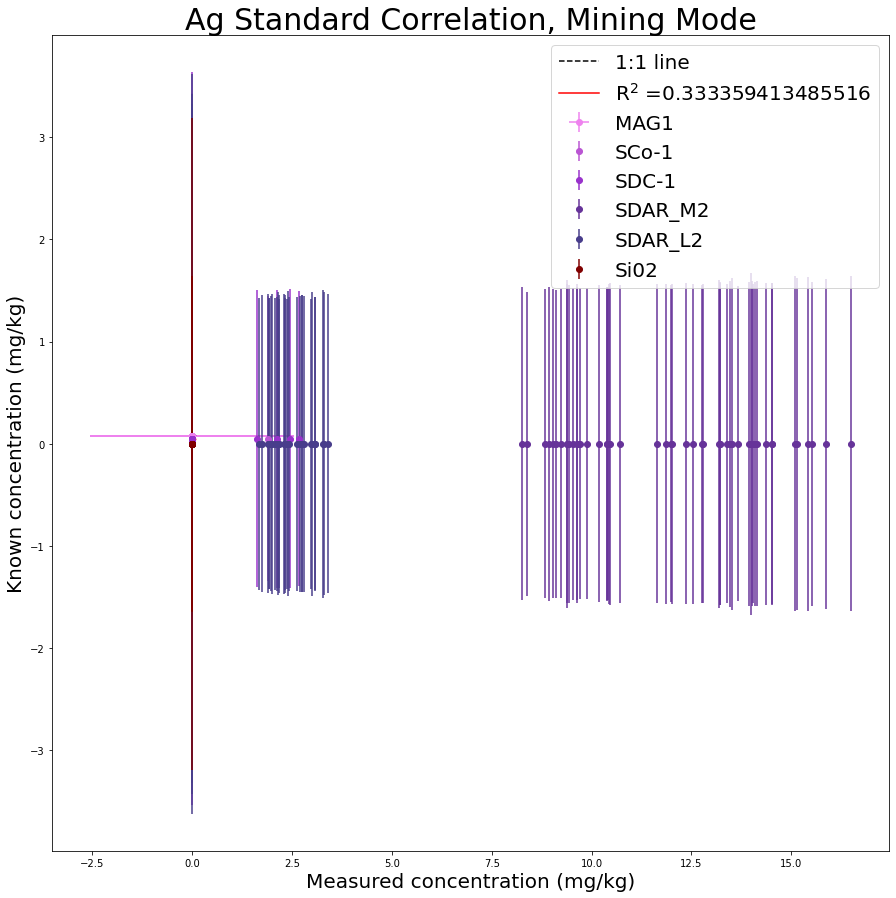

Working on Al


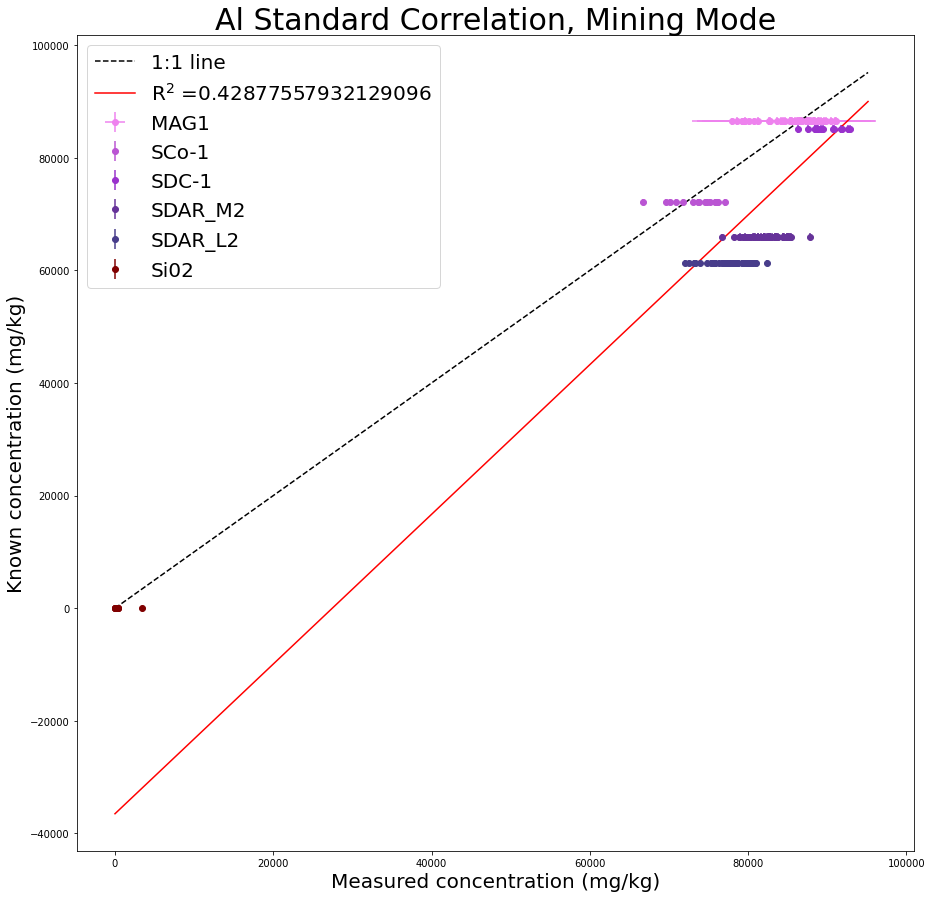

Working on As


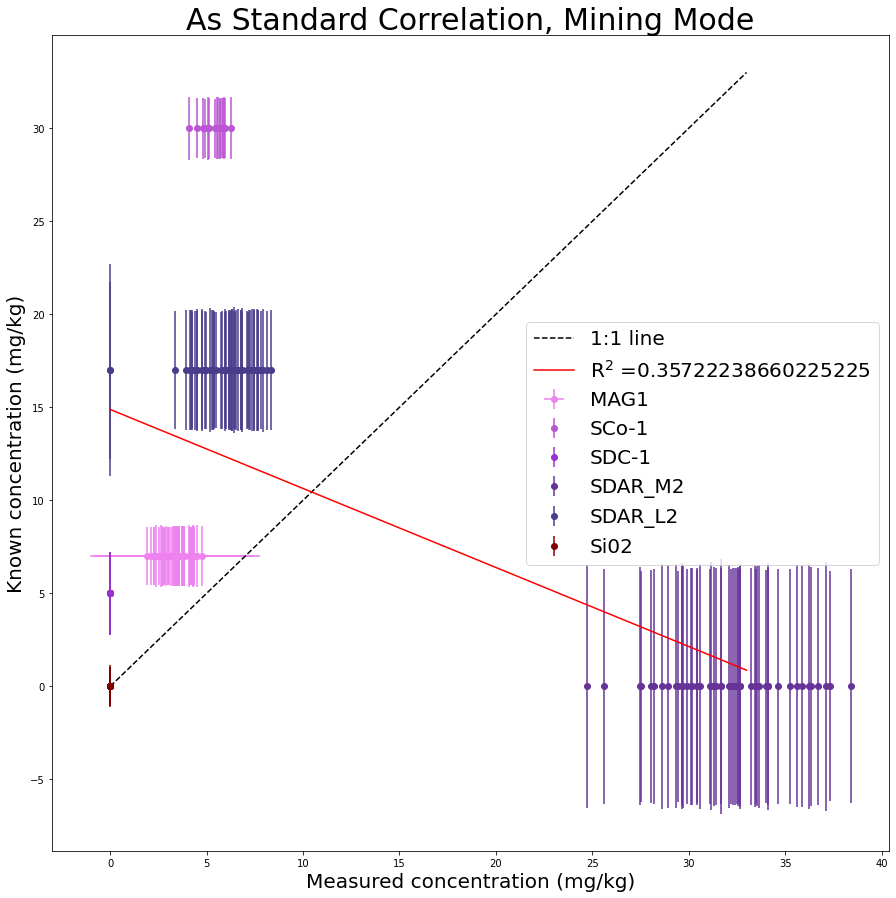

Working on Au


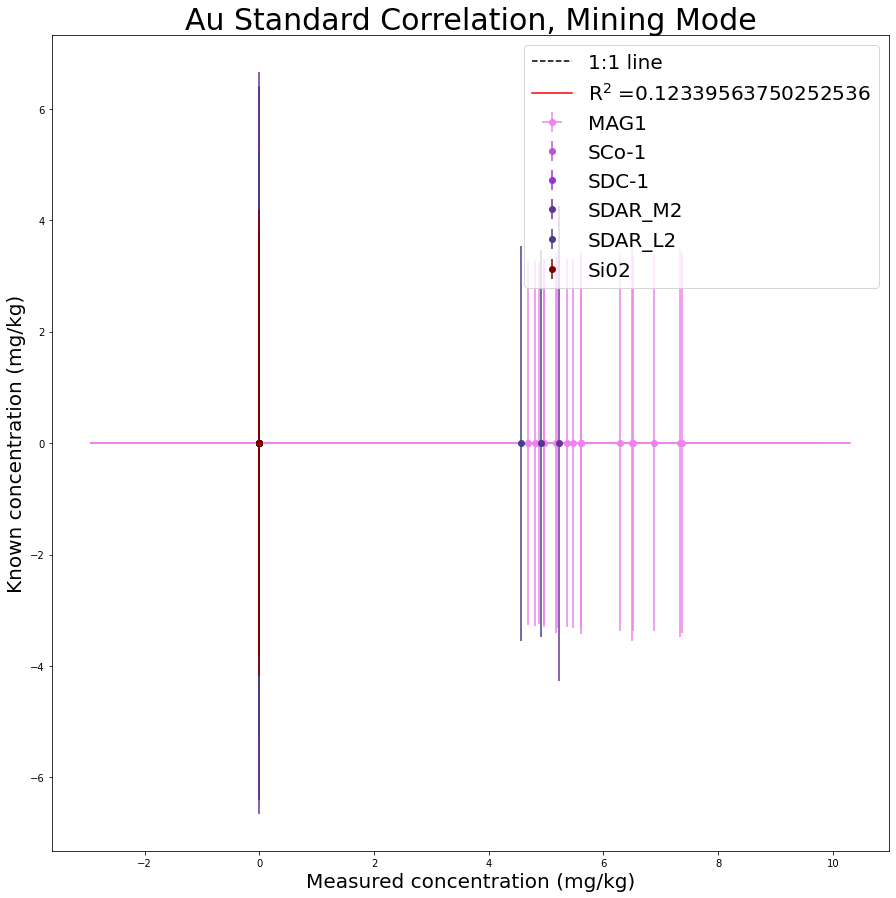

Working on Ba


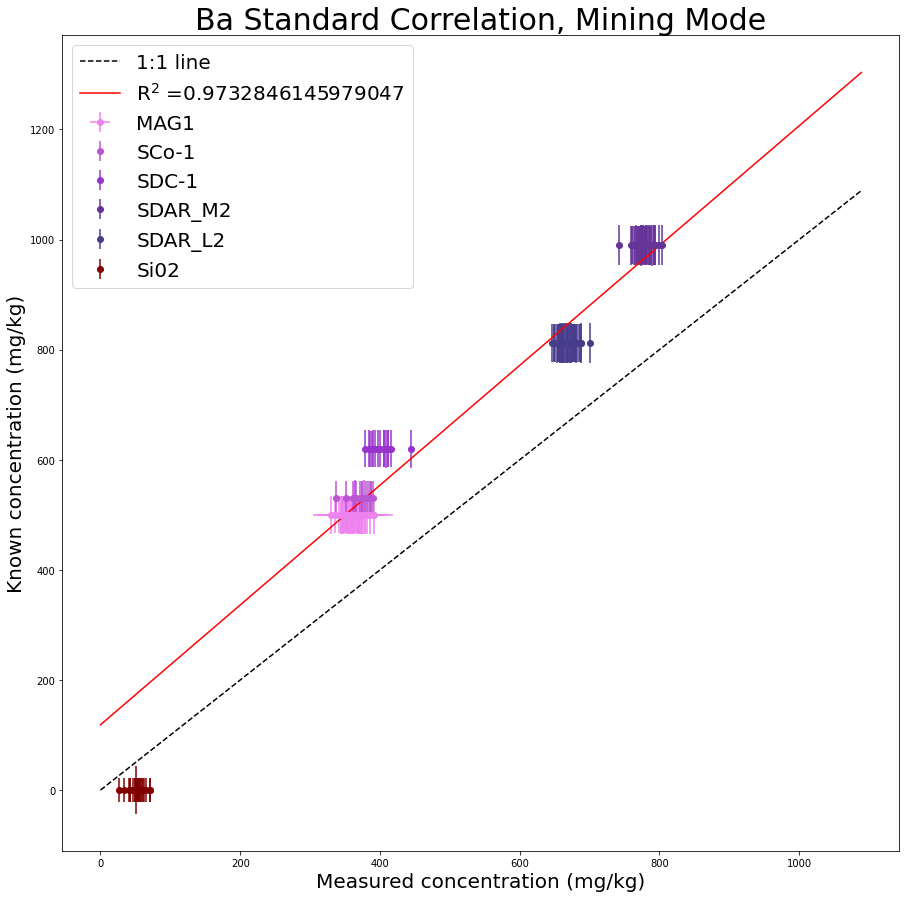

Working on Bal


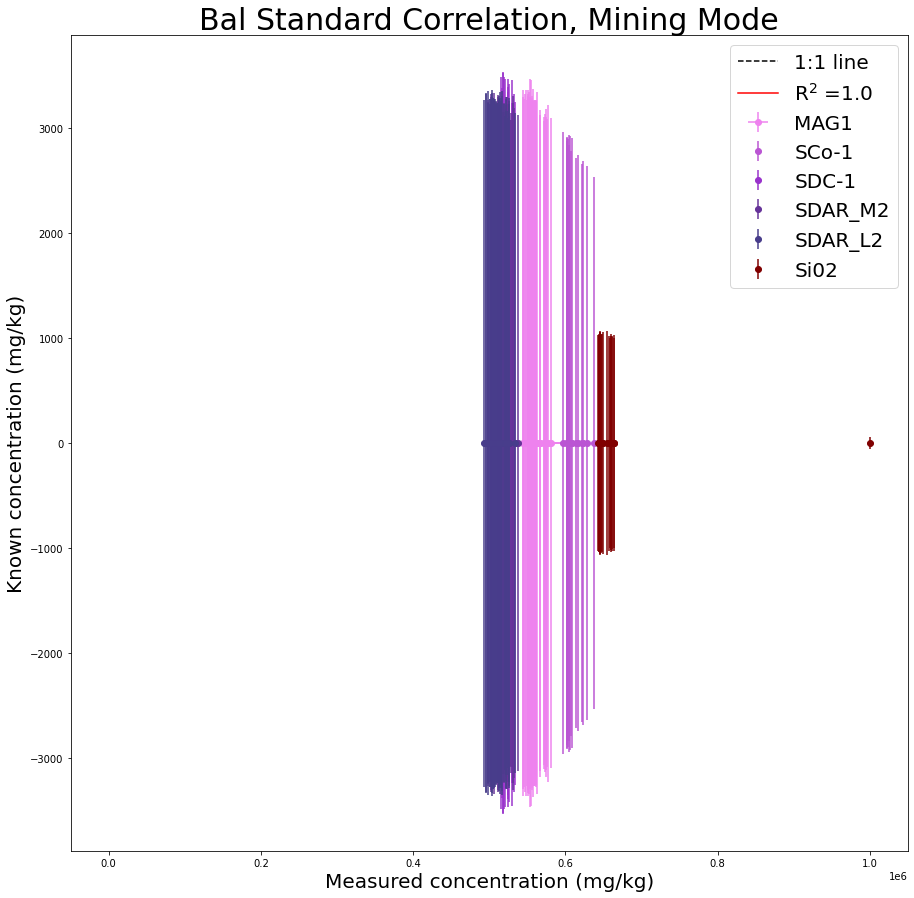

Working on Bi


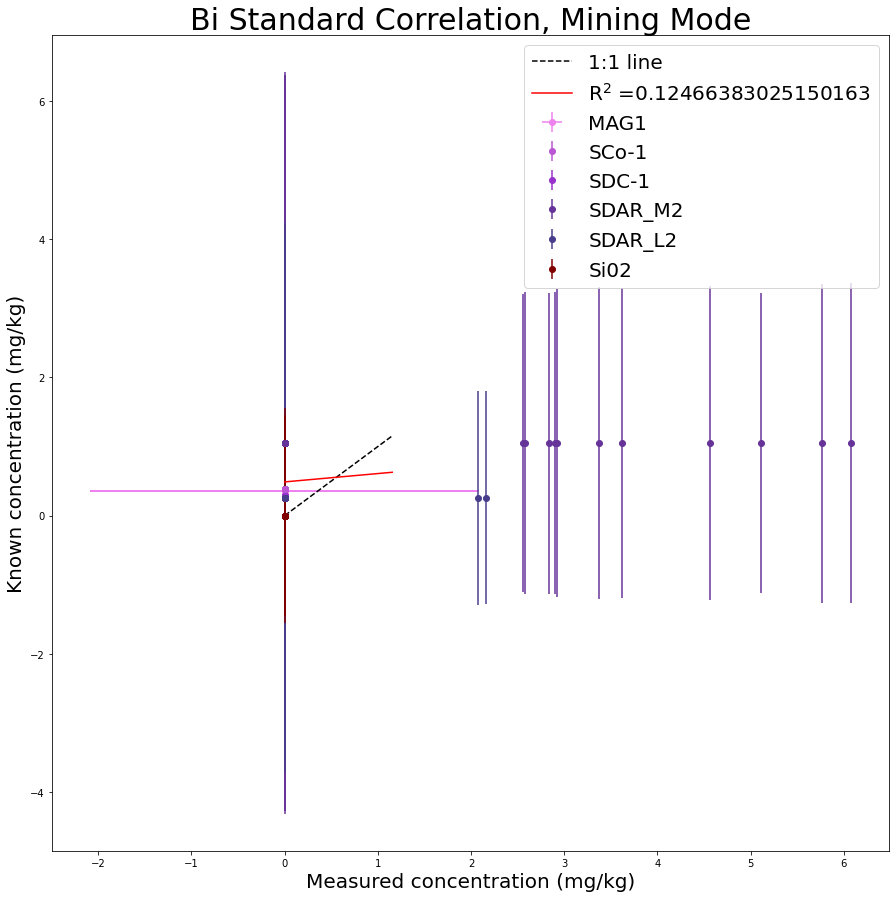

Working on Ca


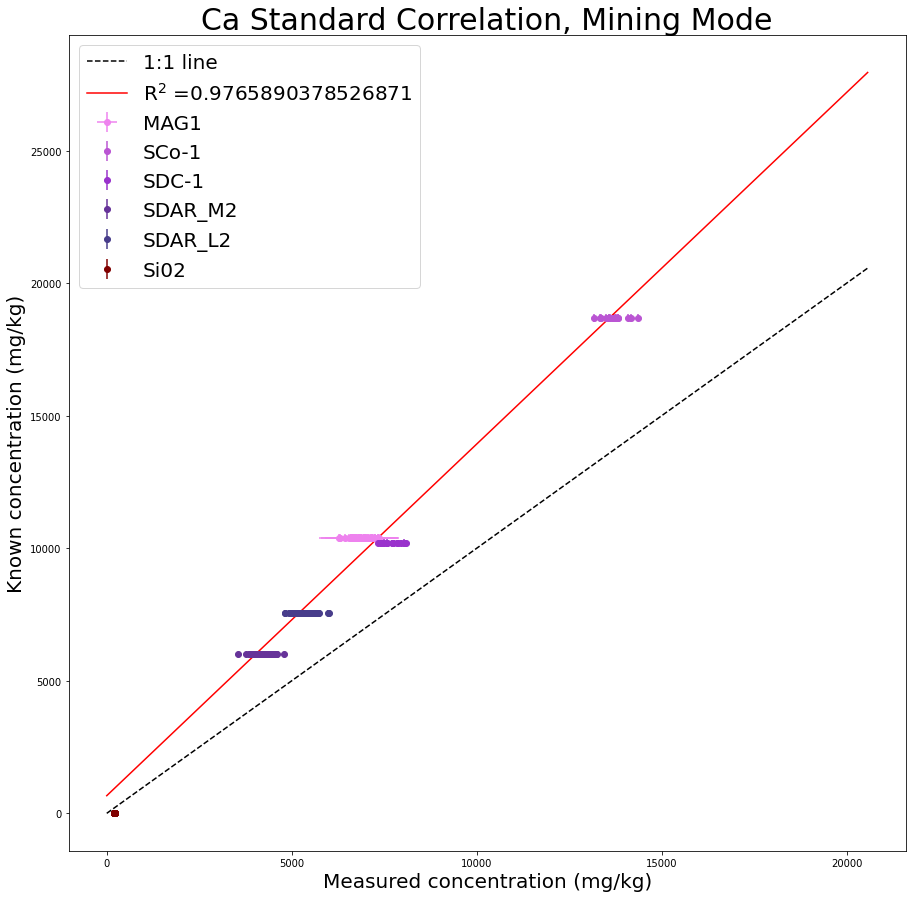

Working on Cd


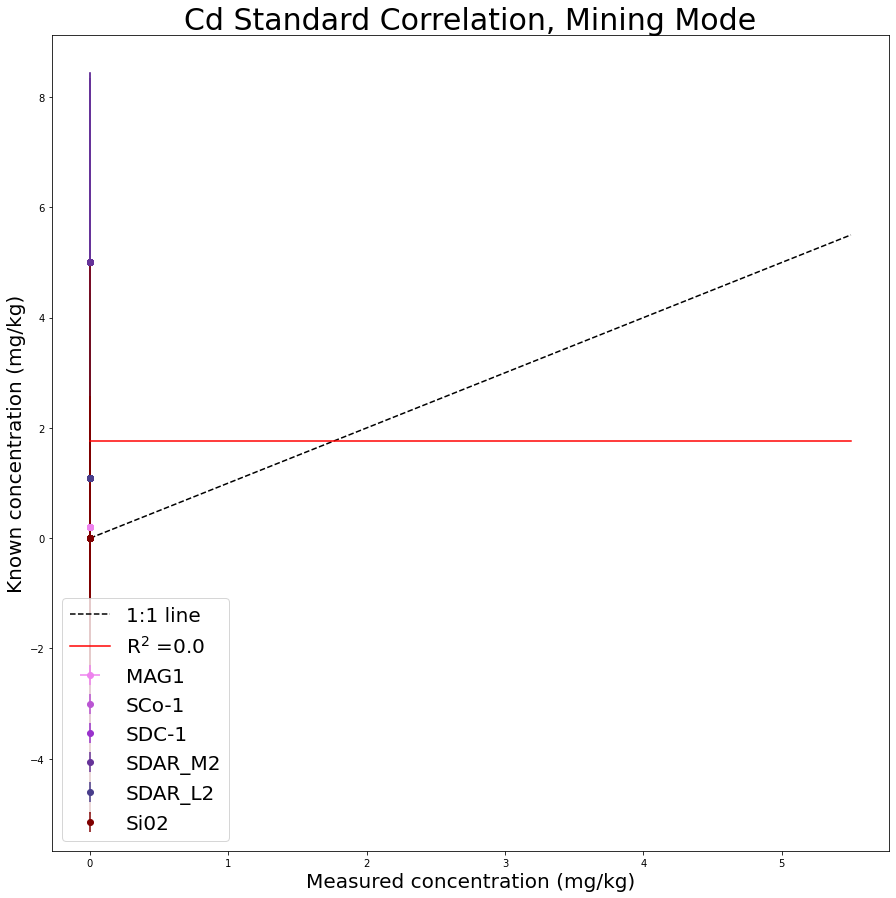

Working on Cl


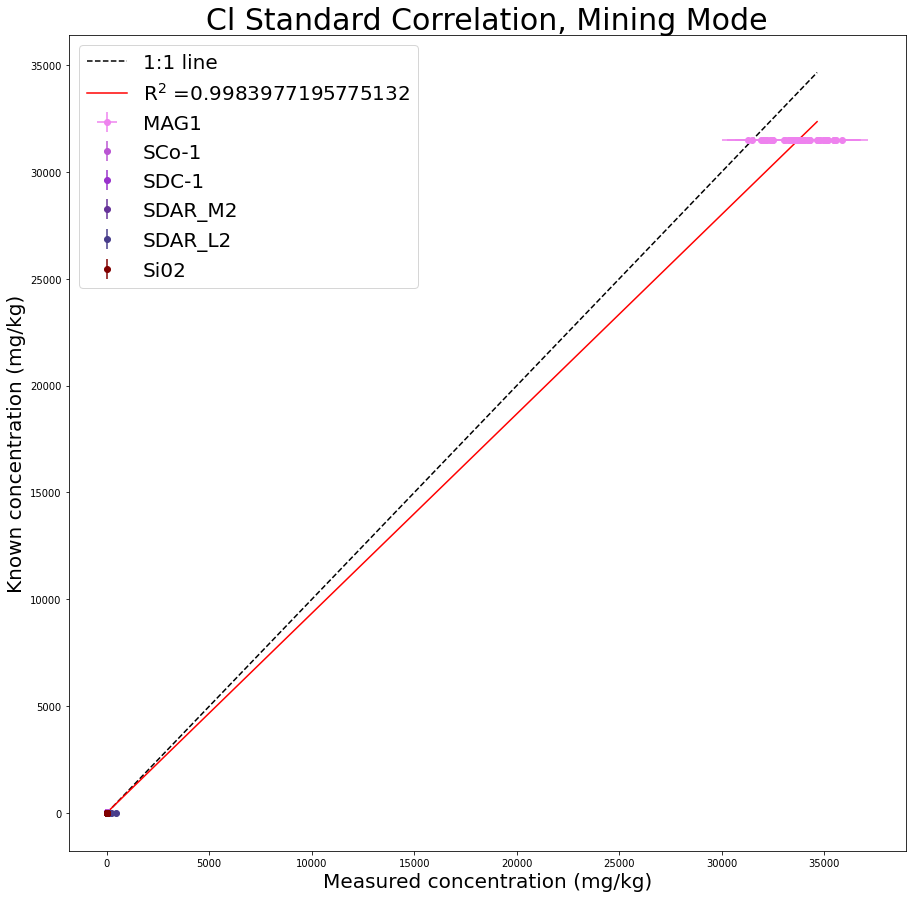

Working on Co


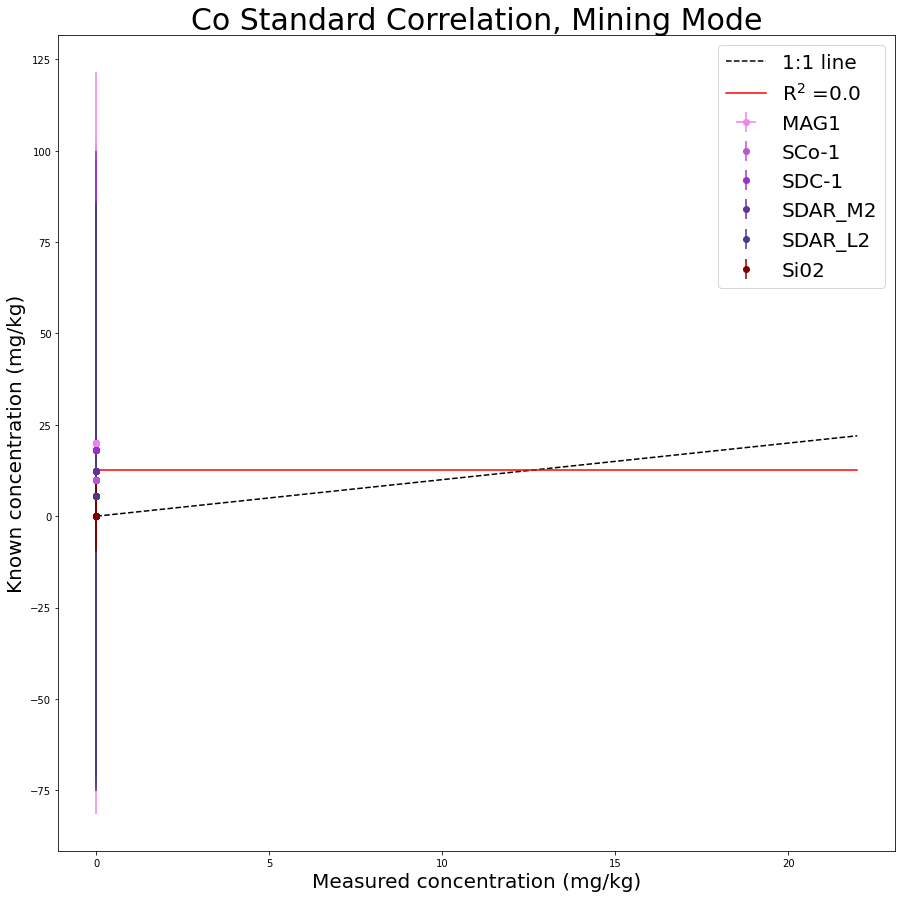

Working on Cr


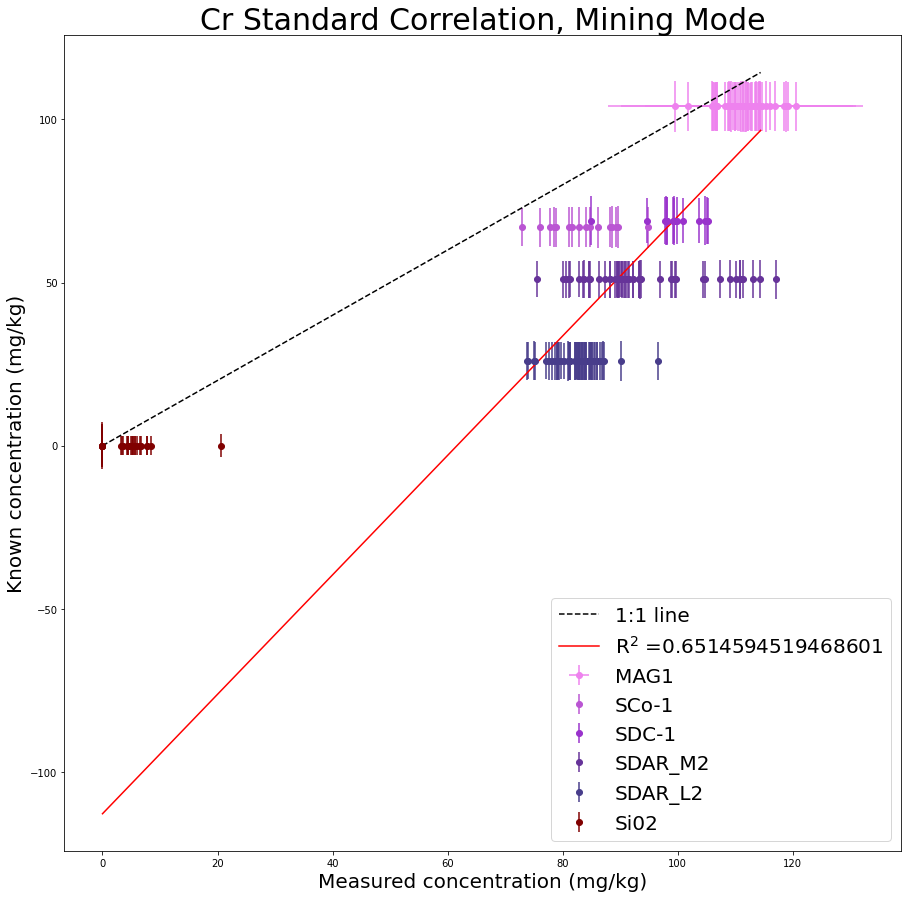

Working on Cu


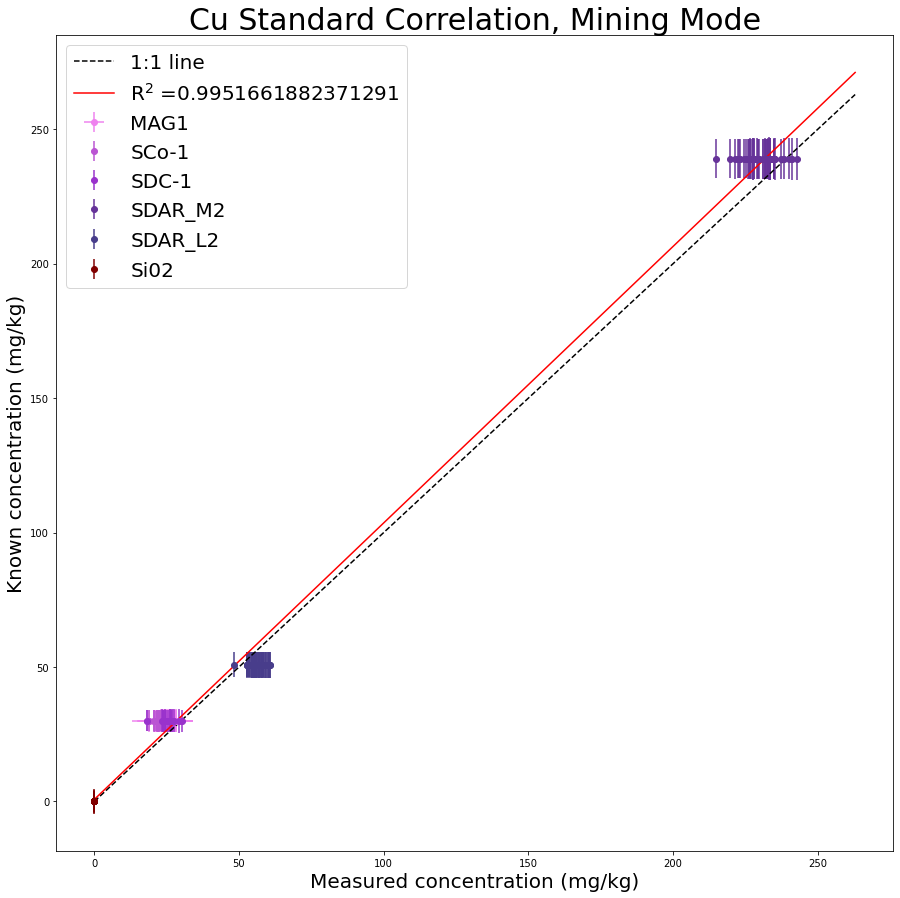

Working on Fe


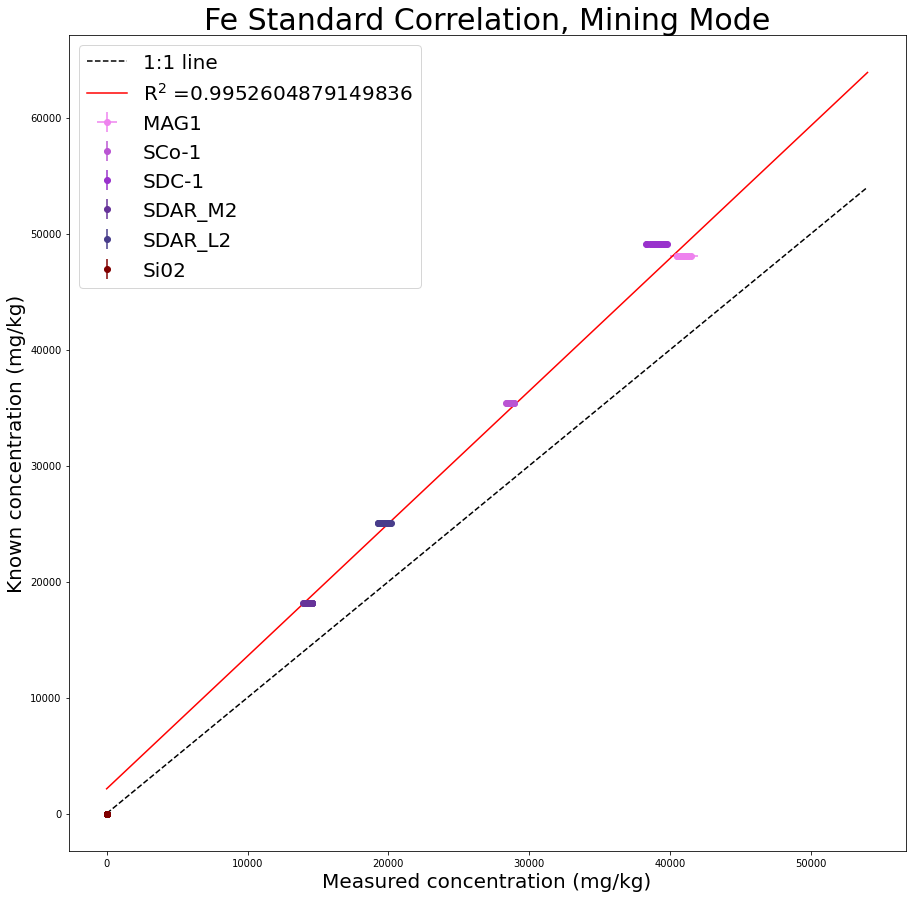

Working on Hf


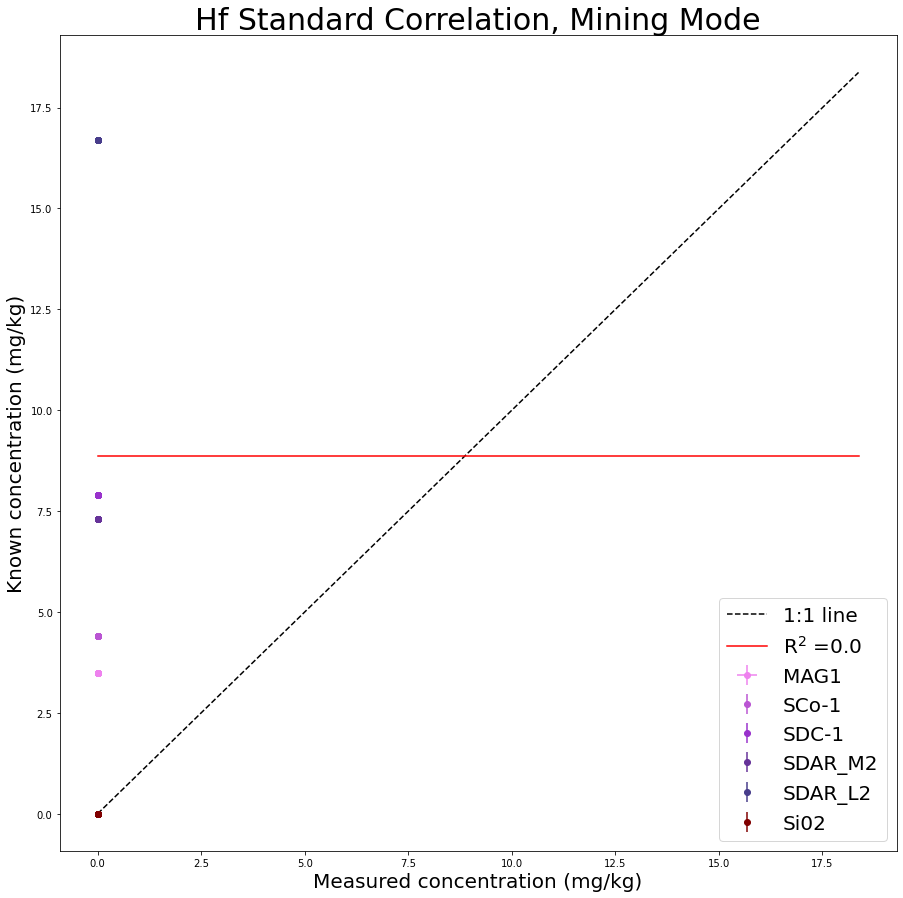

Working on Hg


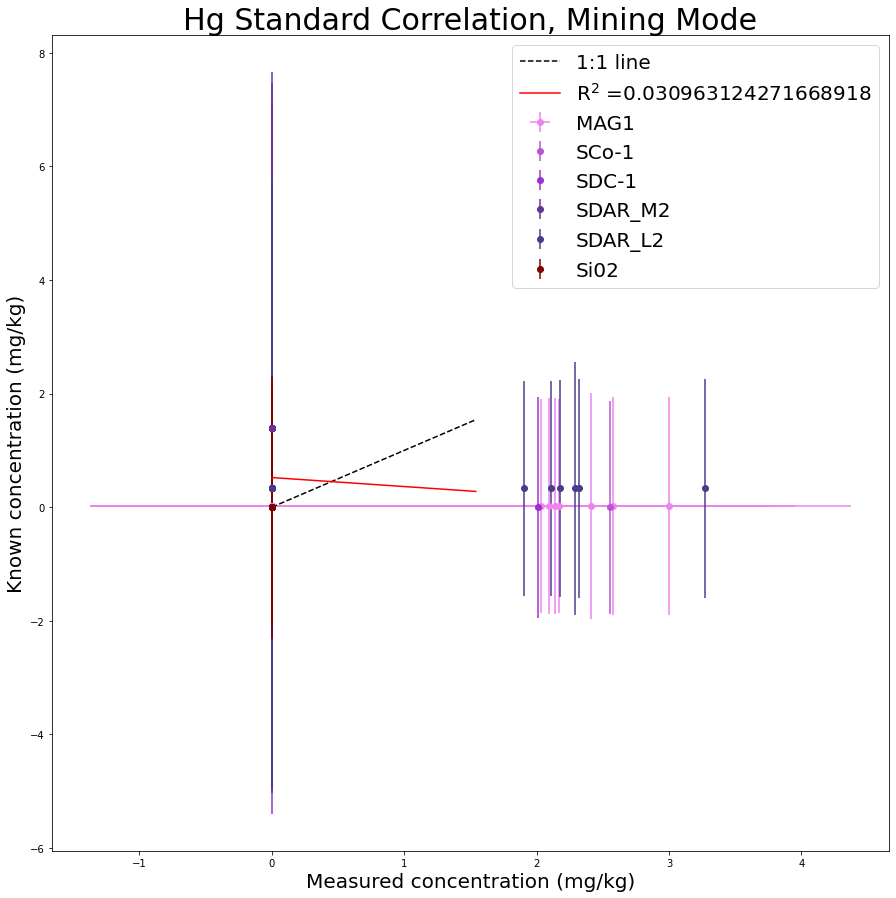

Working on K


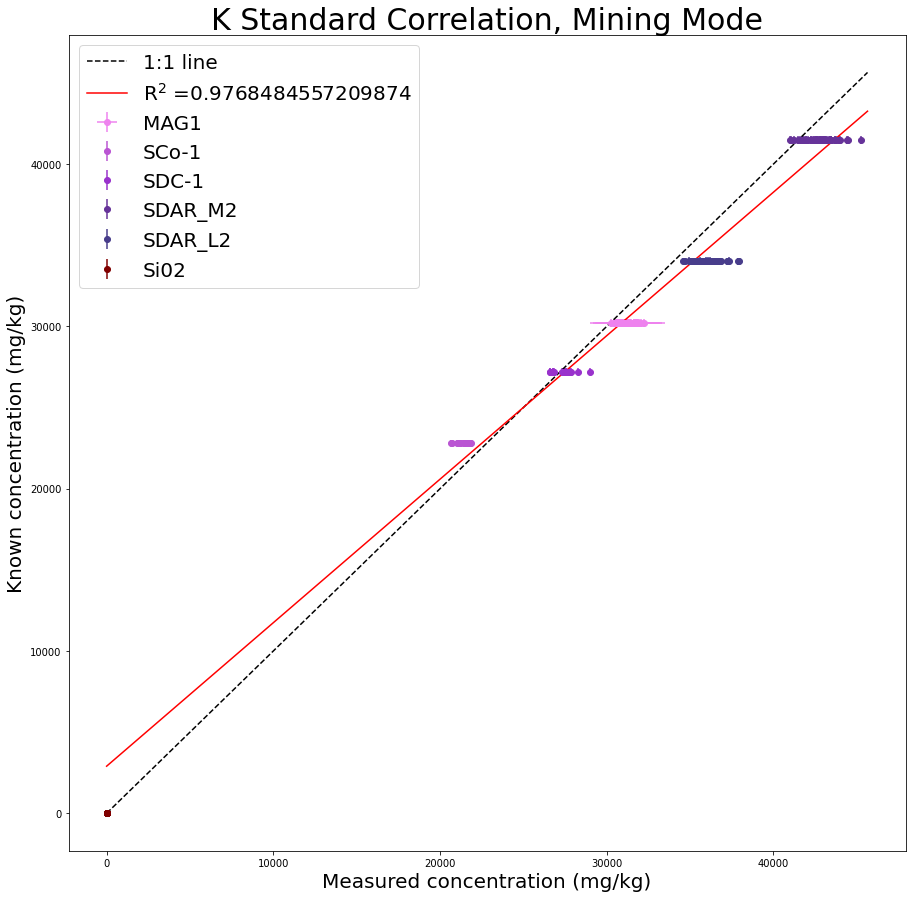

Working on Mg


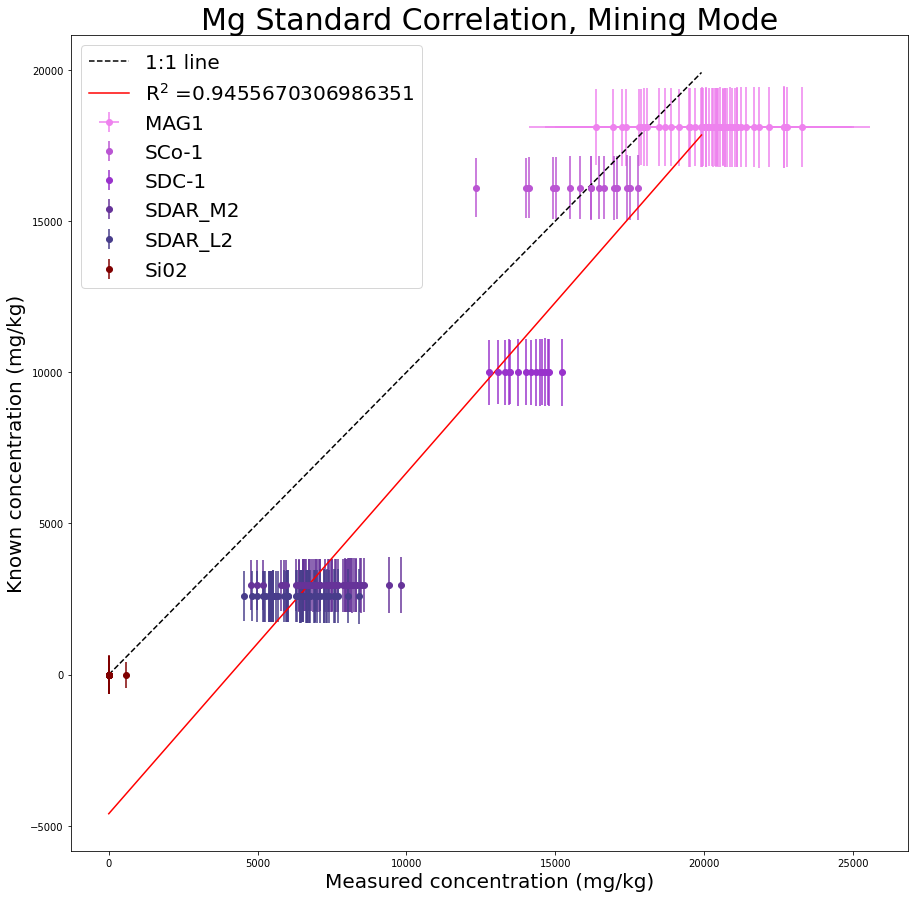

Working on Mn


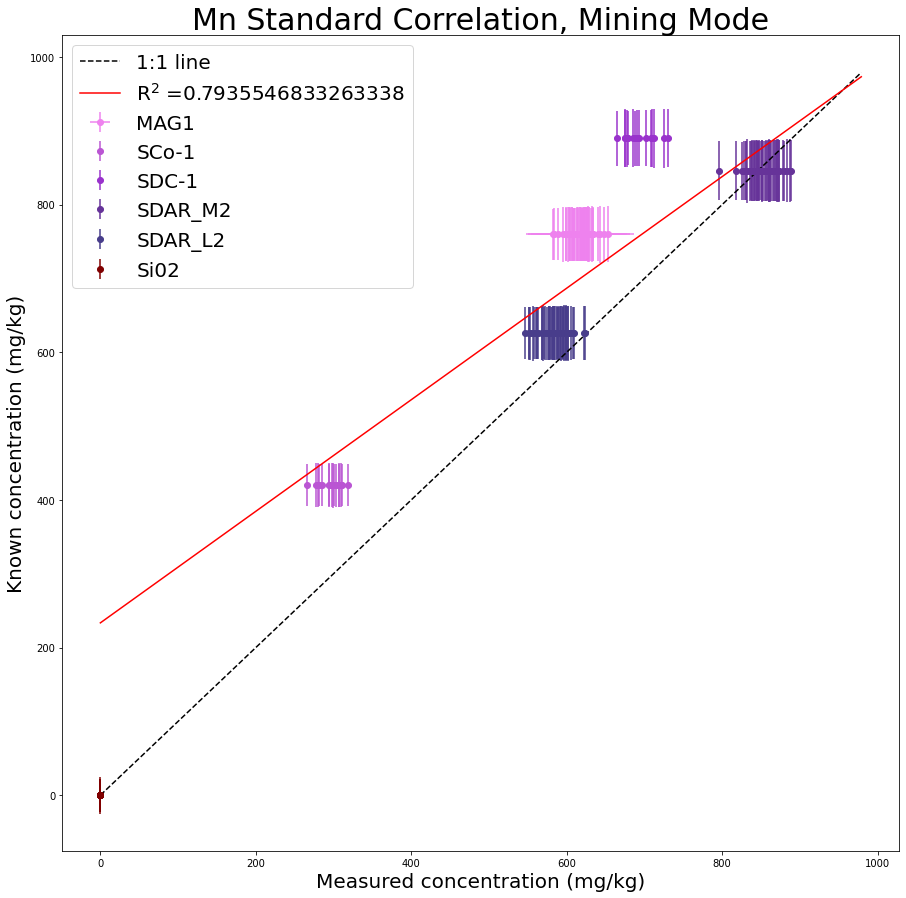

Working on Mo


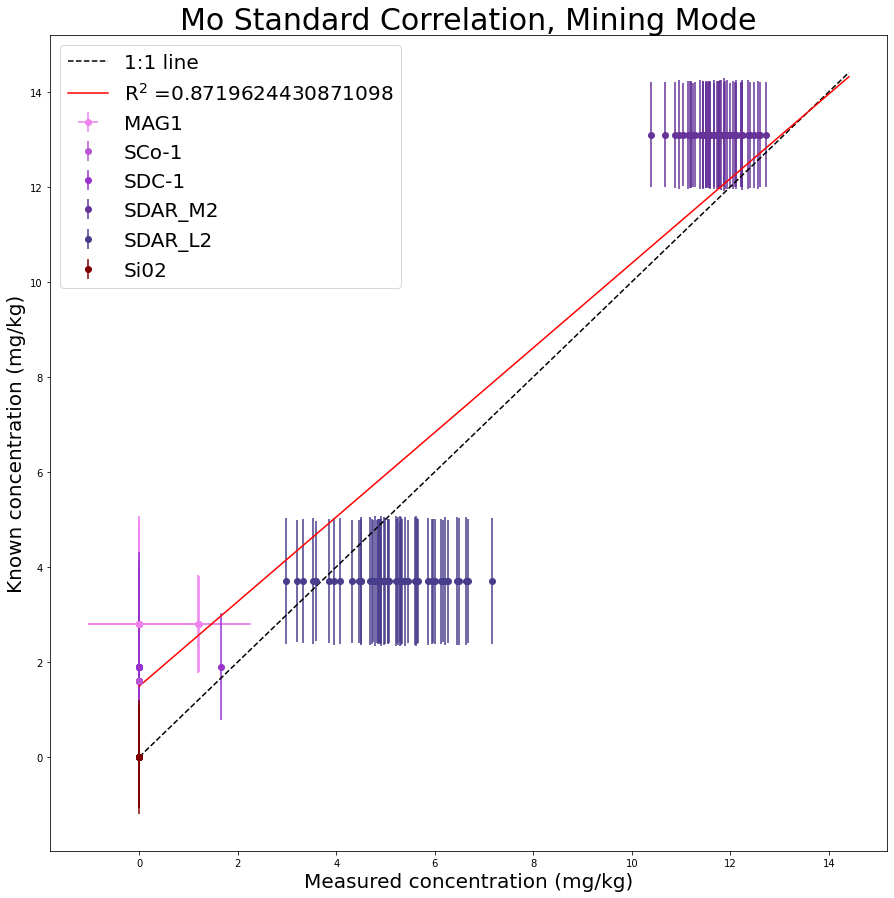

Working on Nb


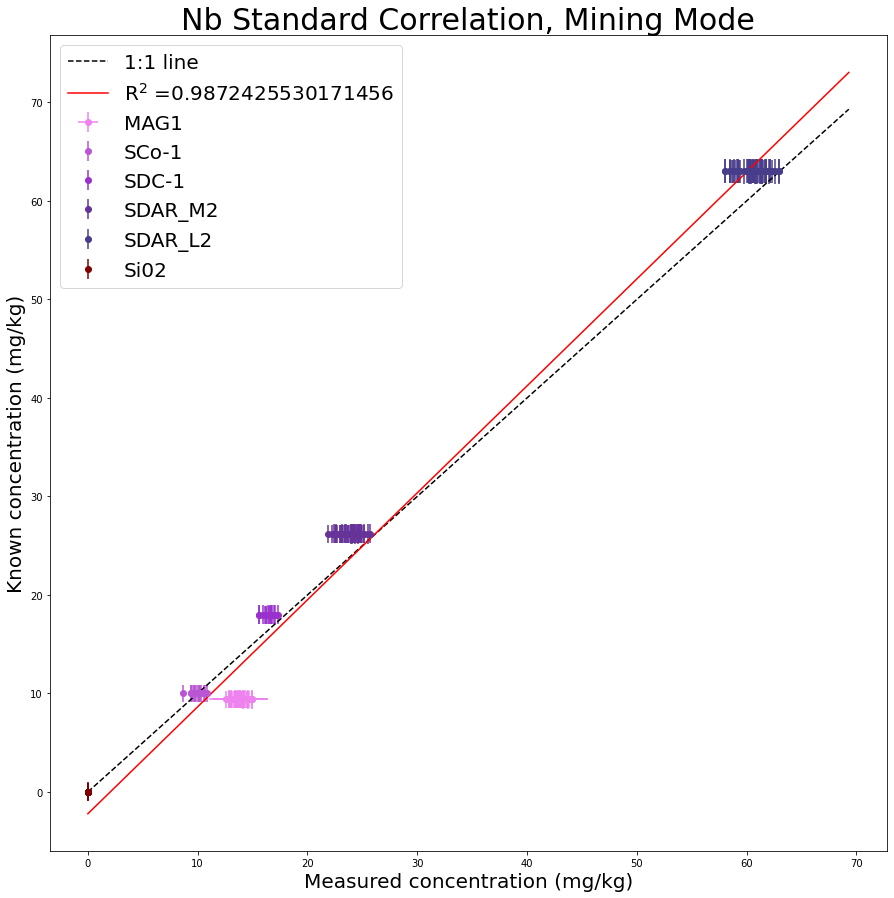

Working on Ni


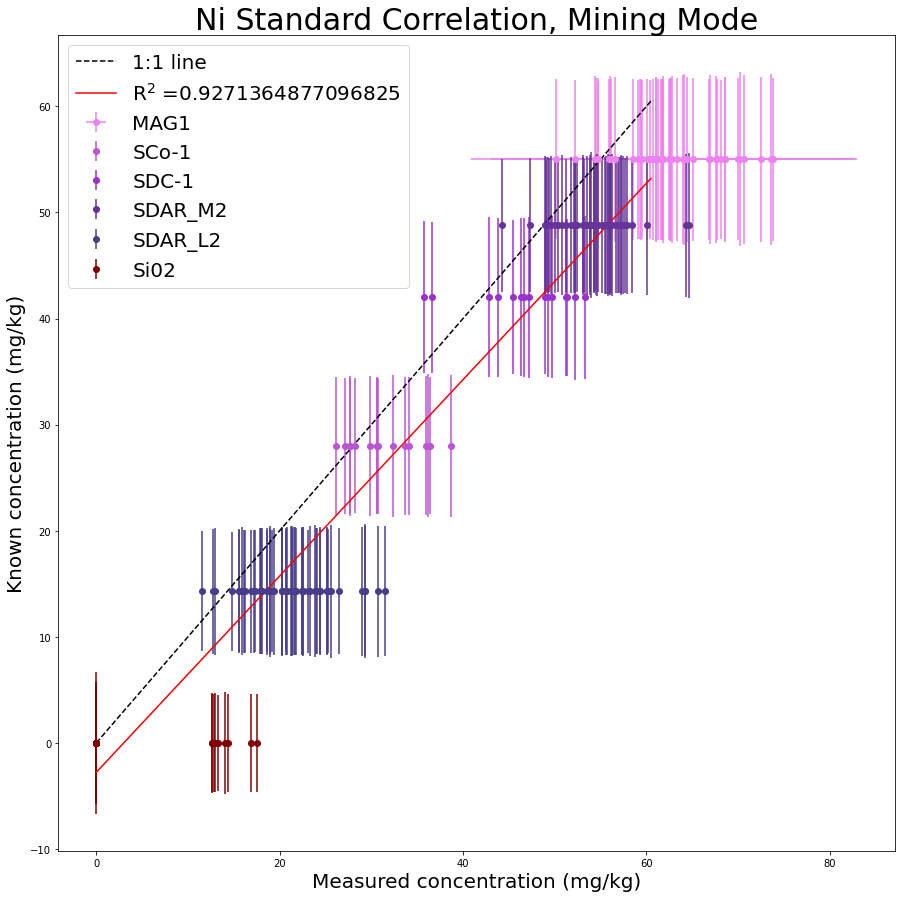

Working on P


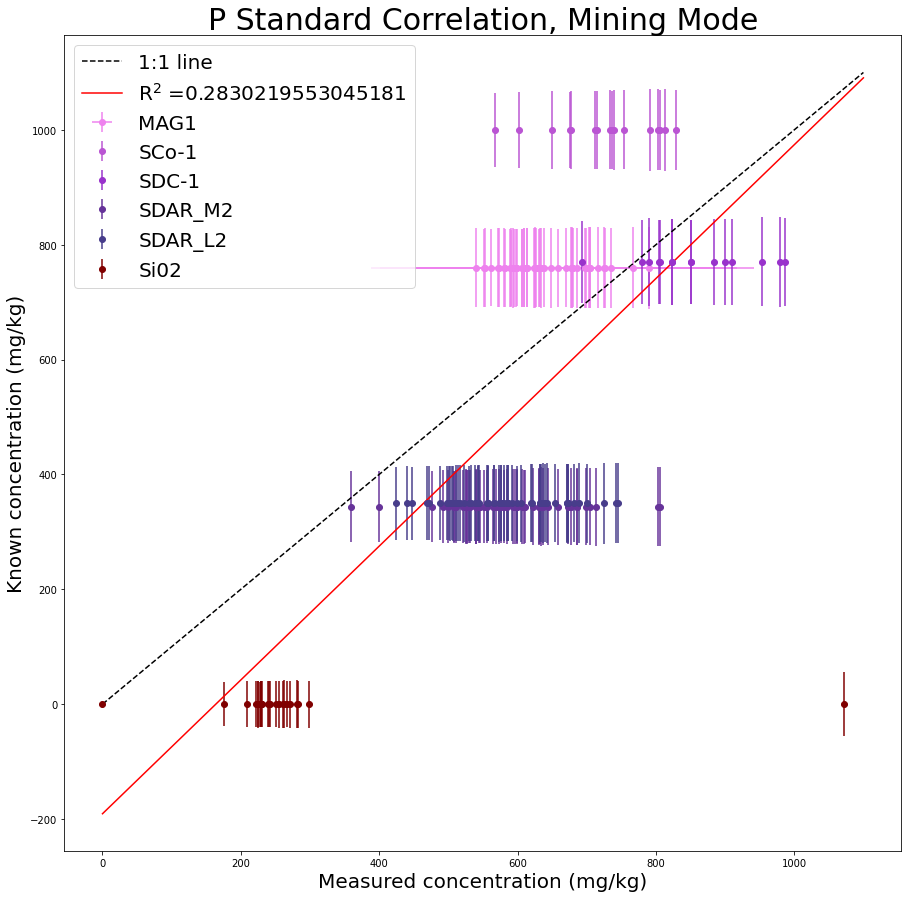

Working on Pb


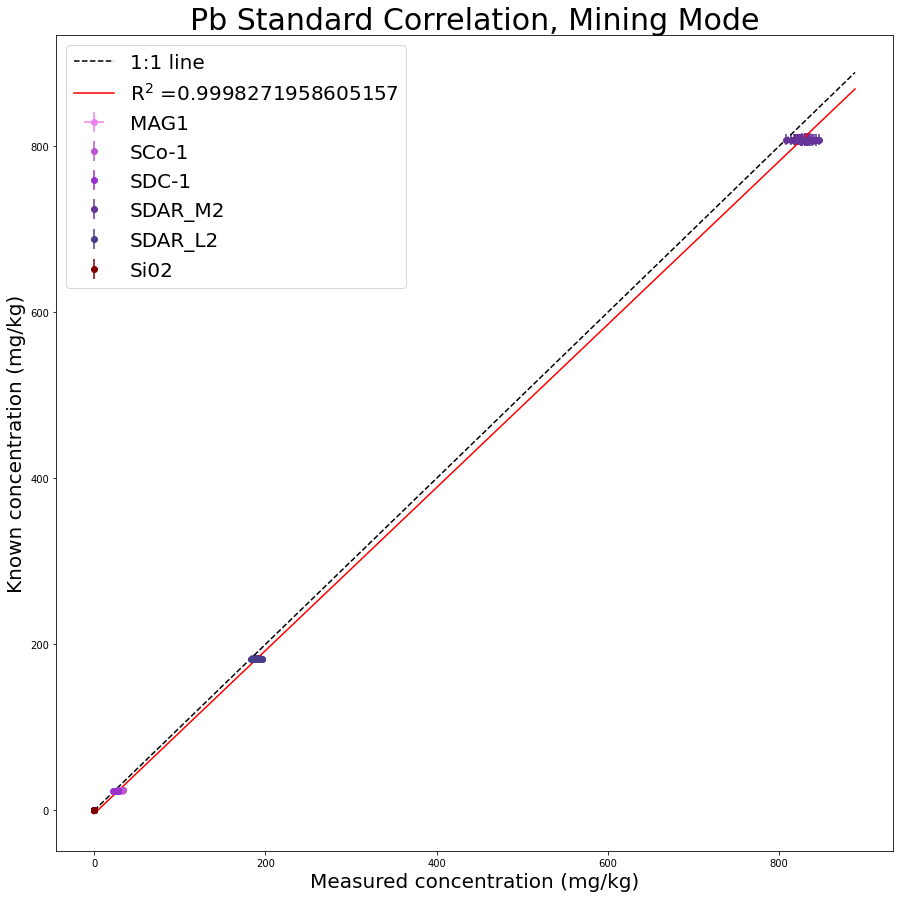

Working on Pd


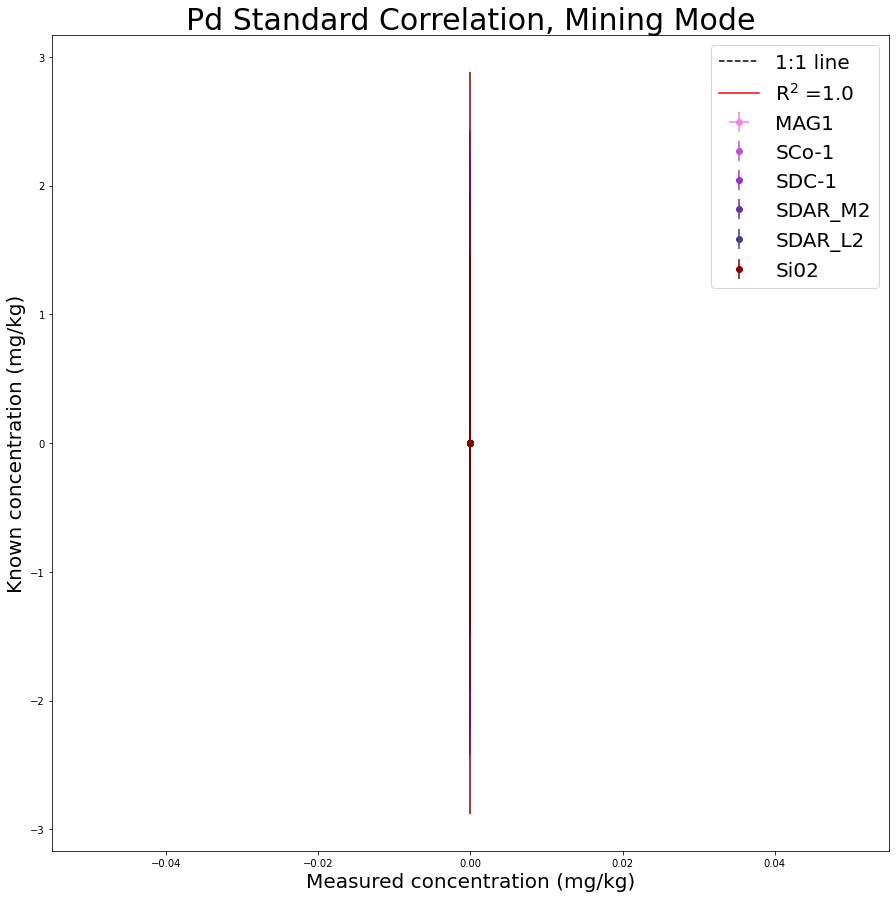

Working on Rb


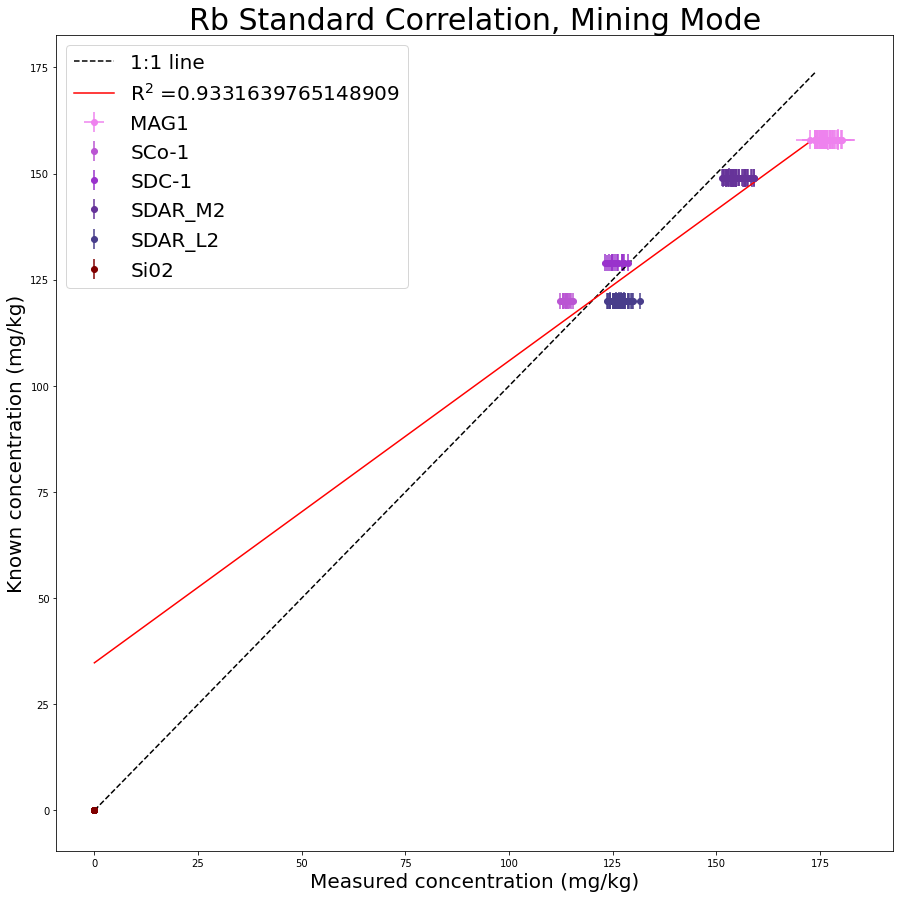

Working on Re


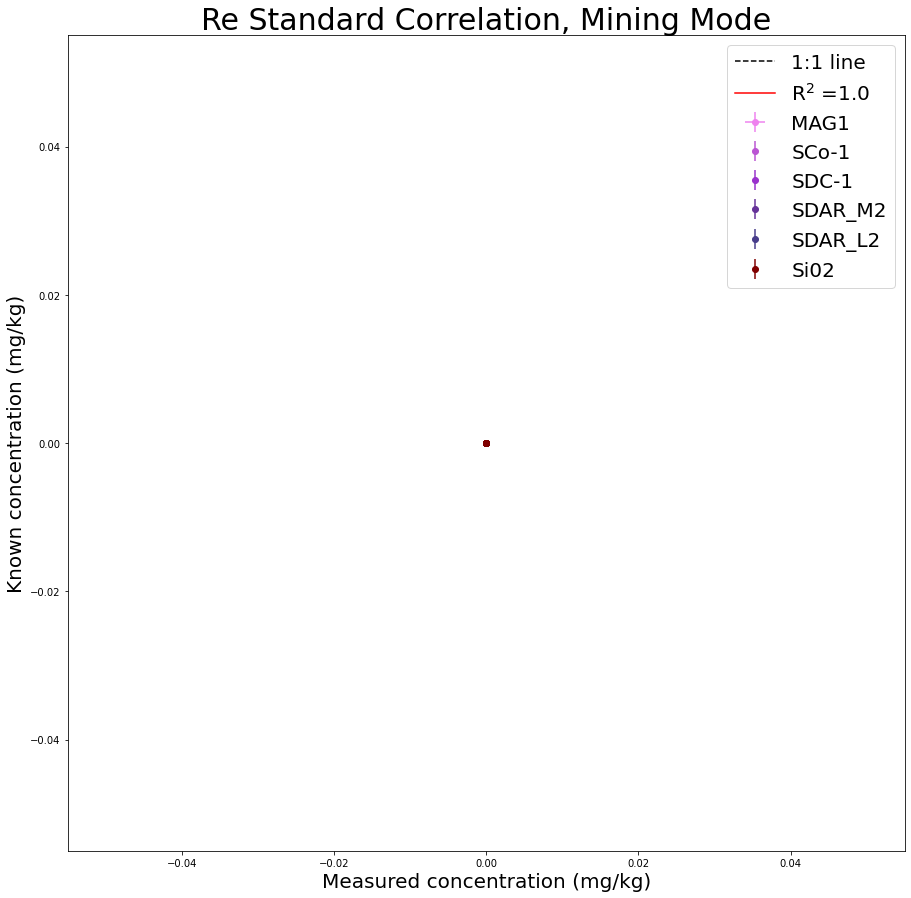

Working on S


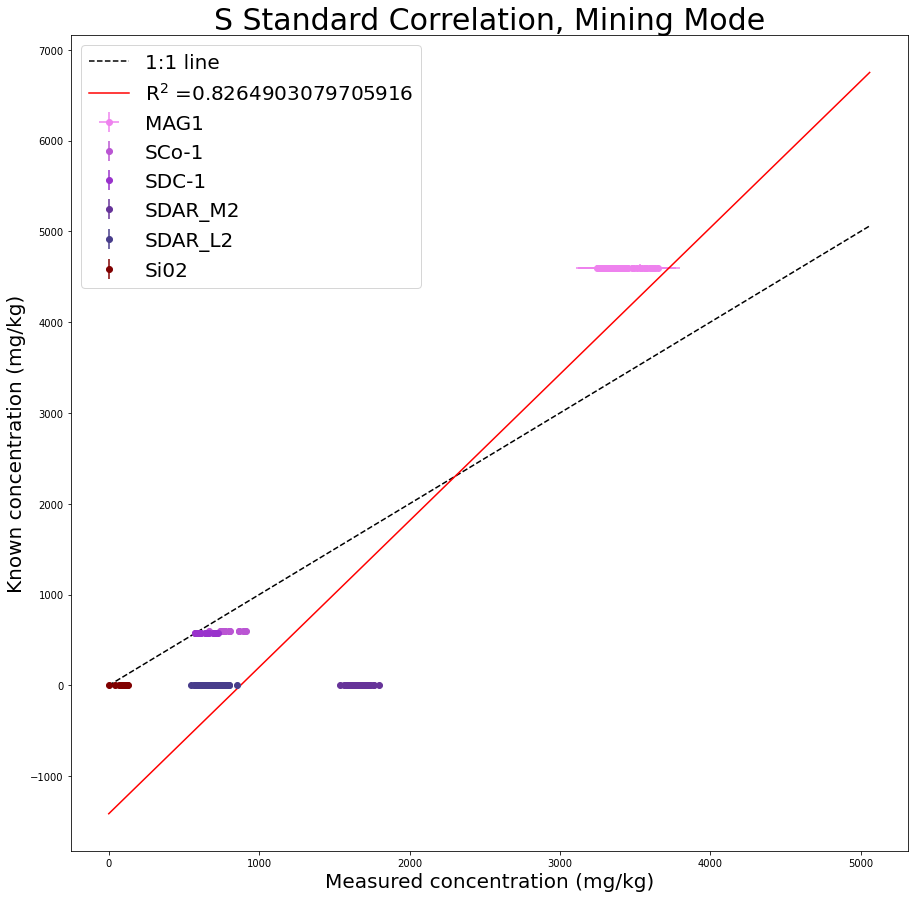

Working on Sb


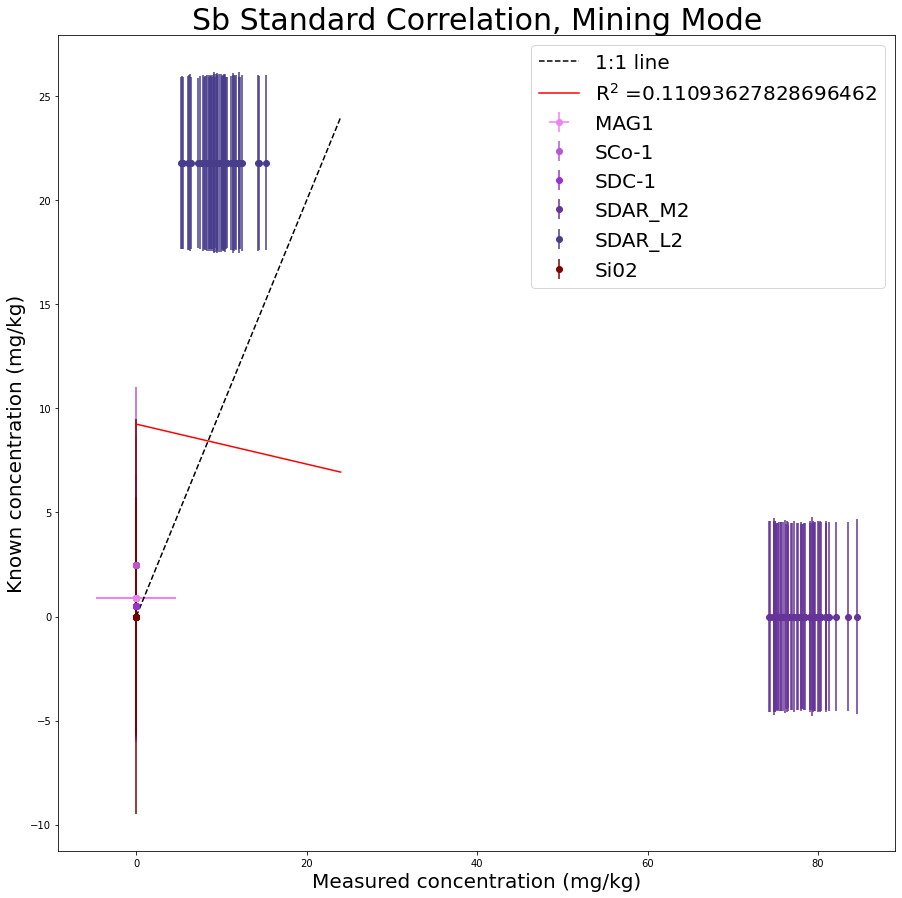

Working on Se


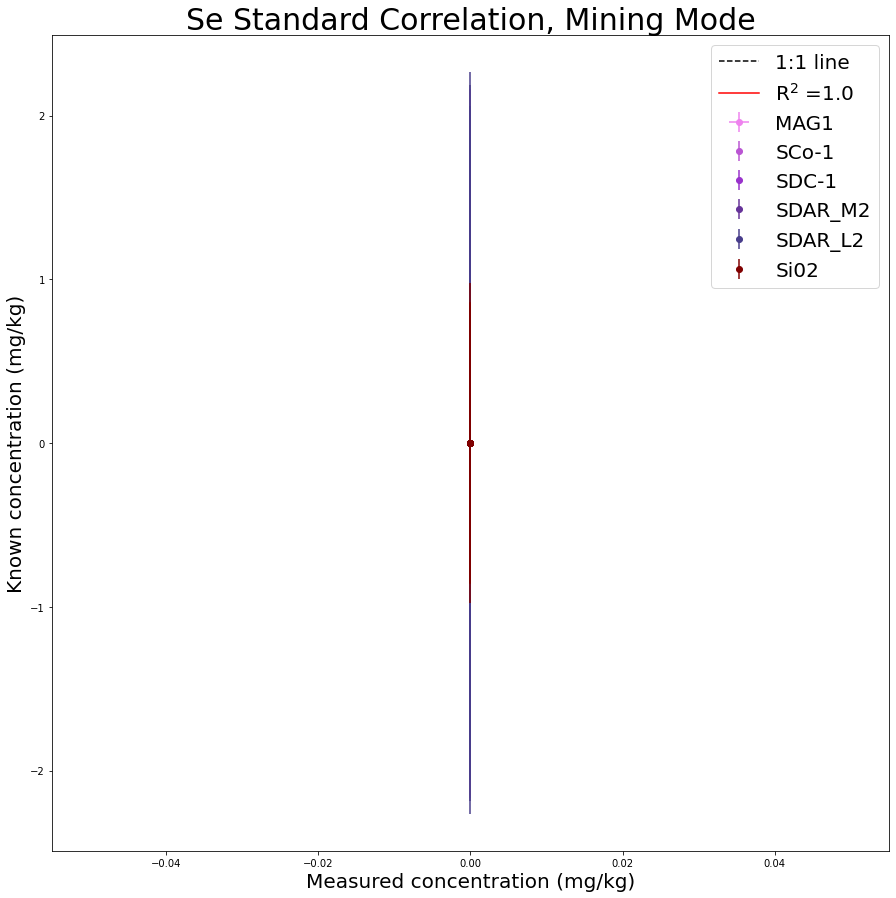

Working on Si


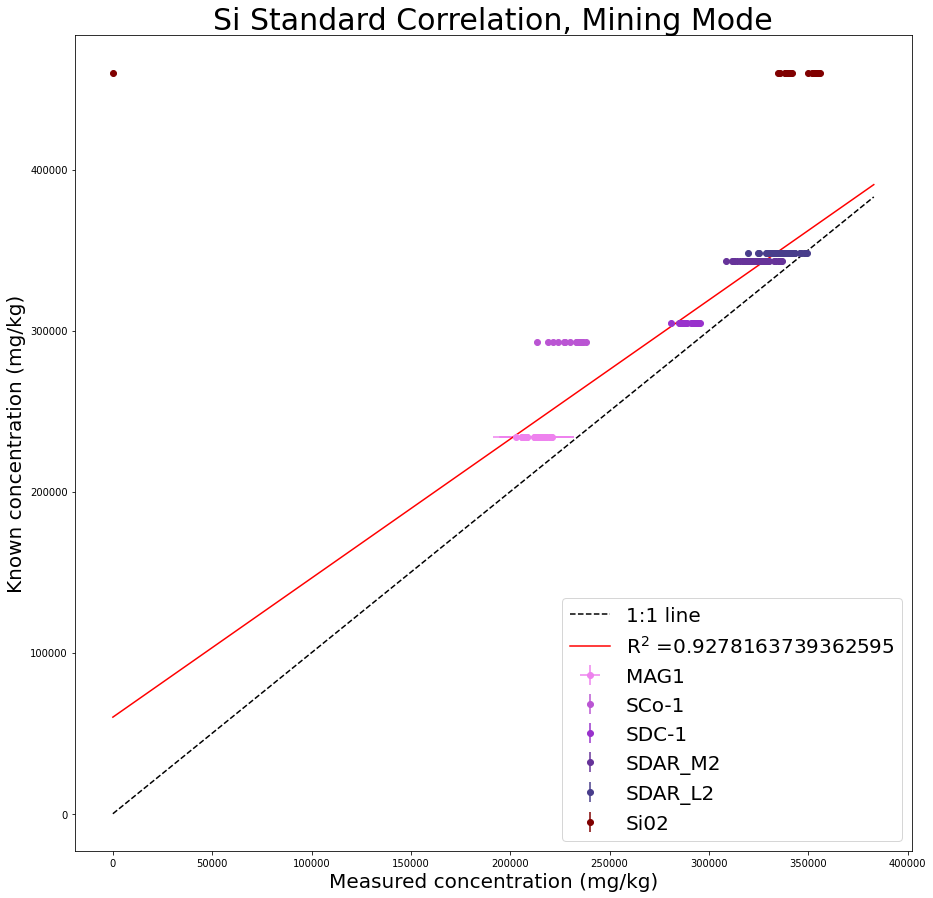

Working on Sn


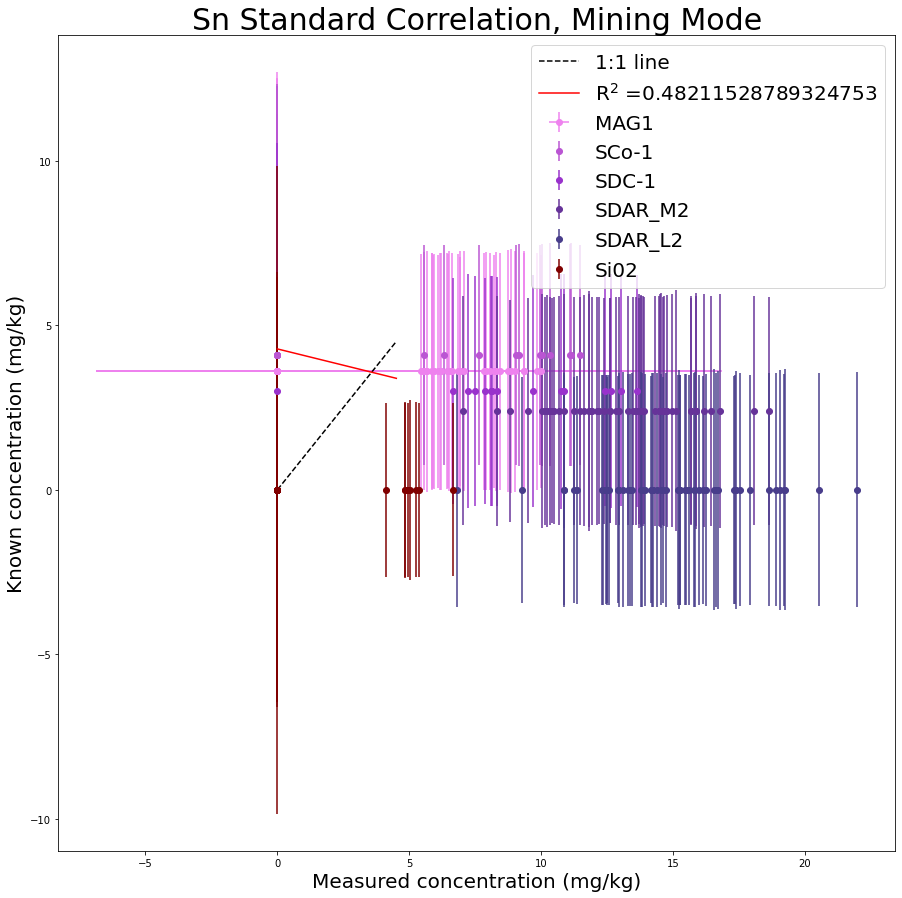

Working on Sr


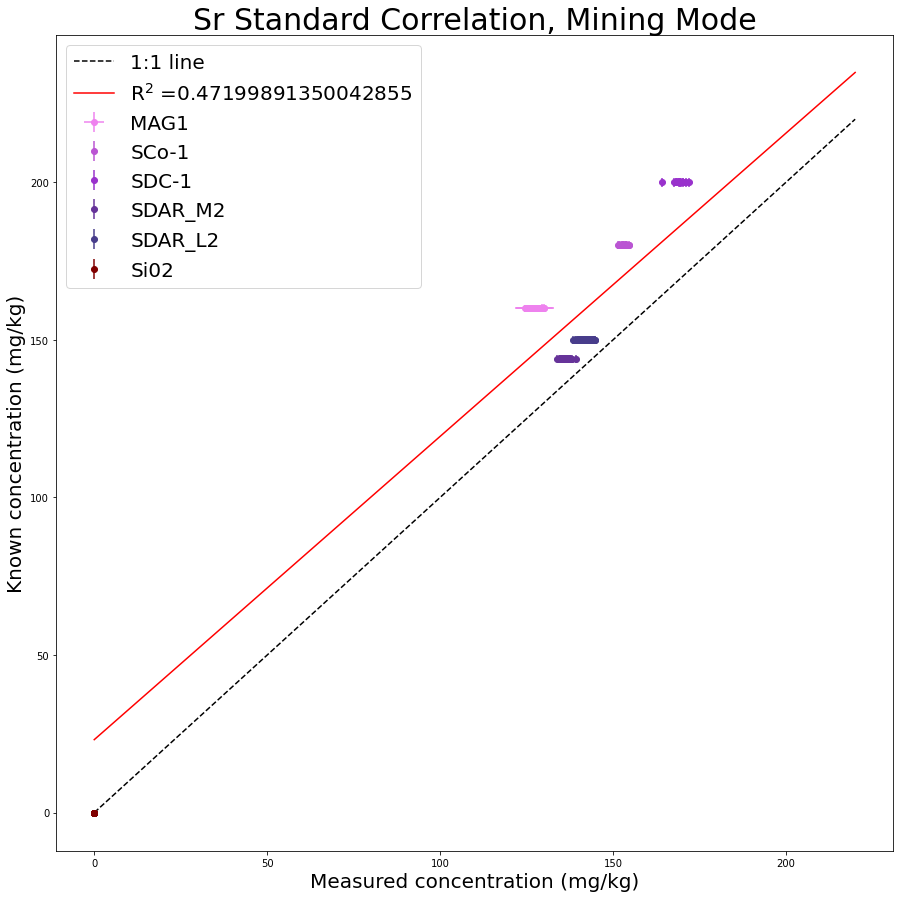

Working on Ta


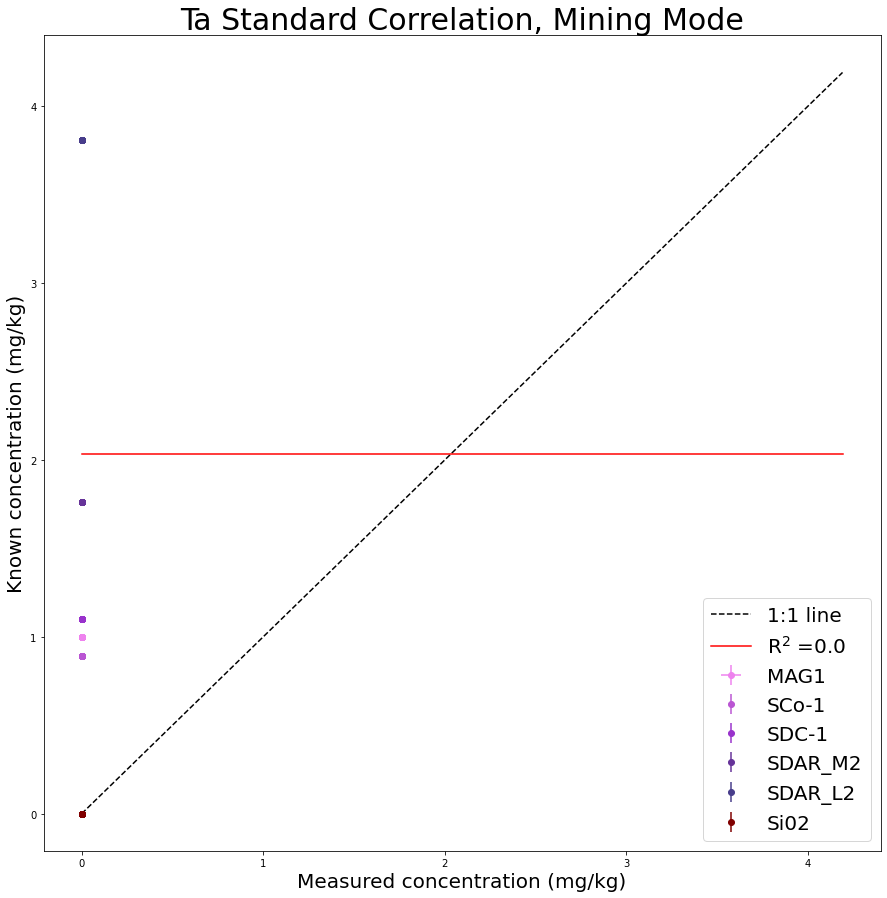

Working on Th


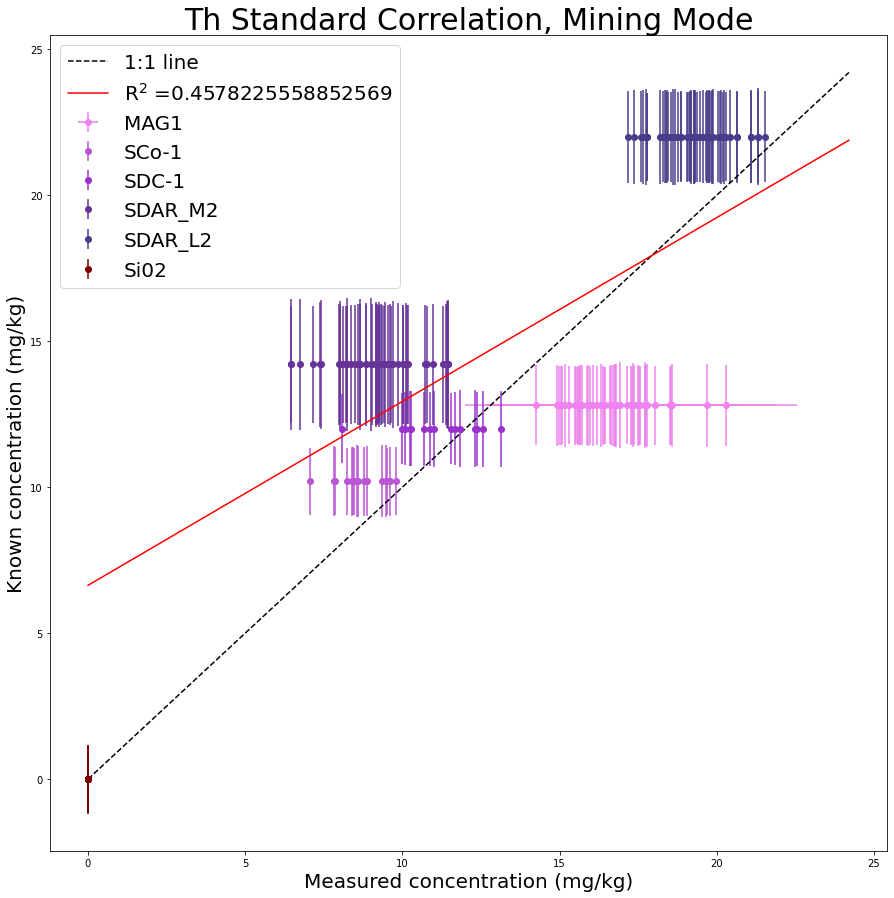

Working on Ti


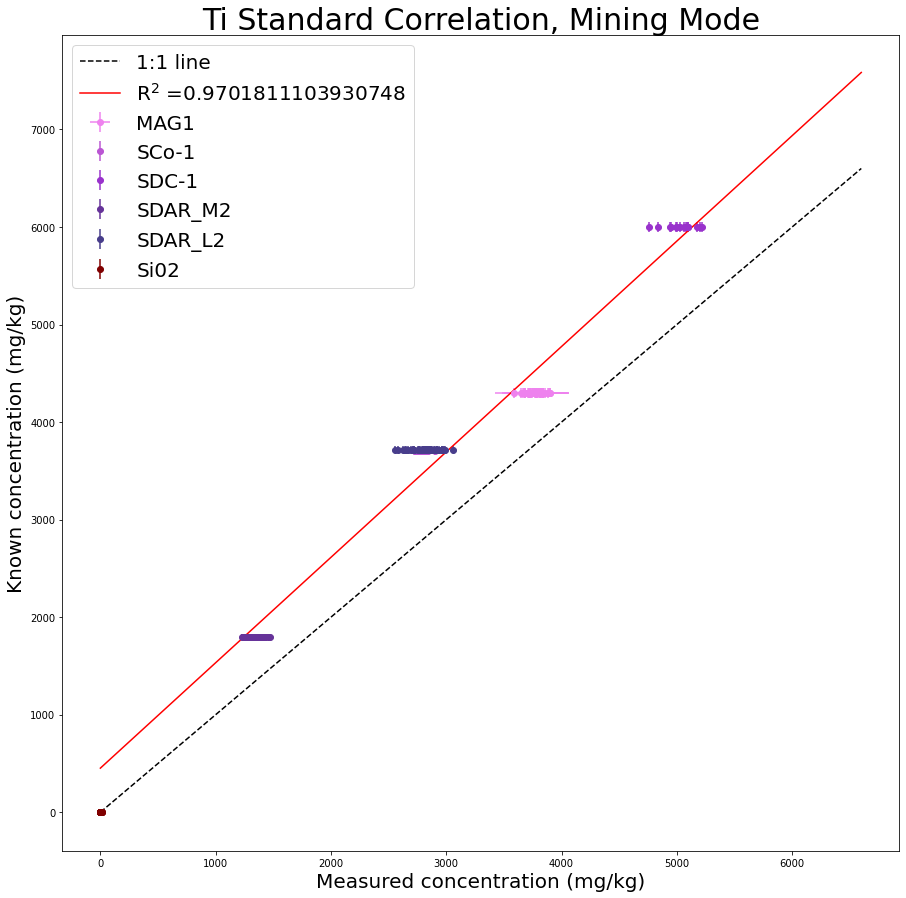

Working on U


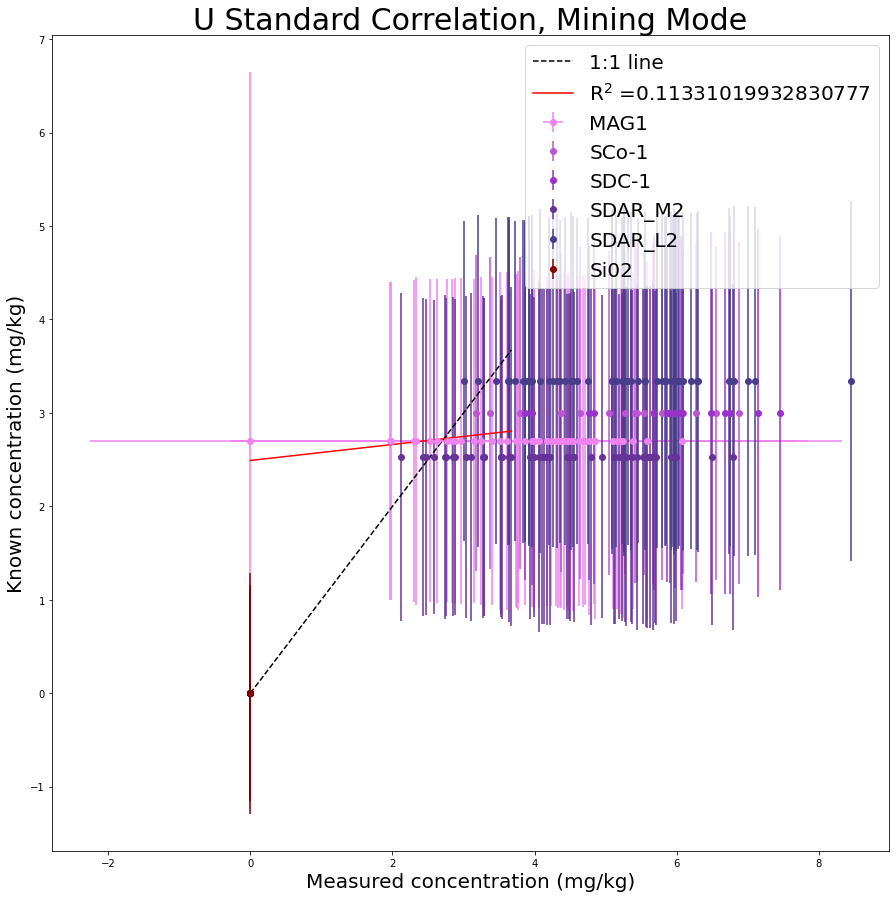

Working on V


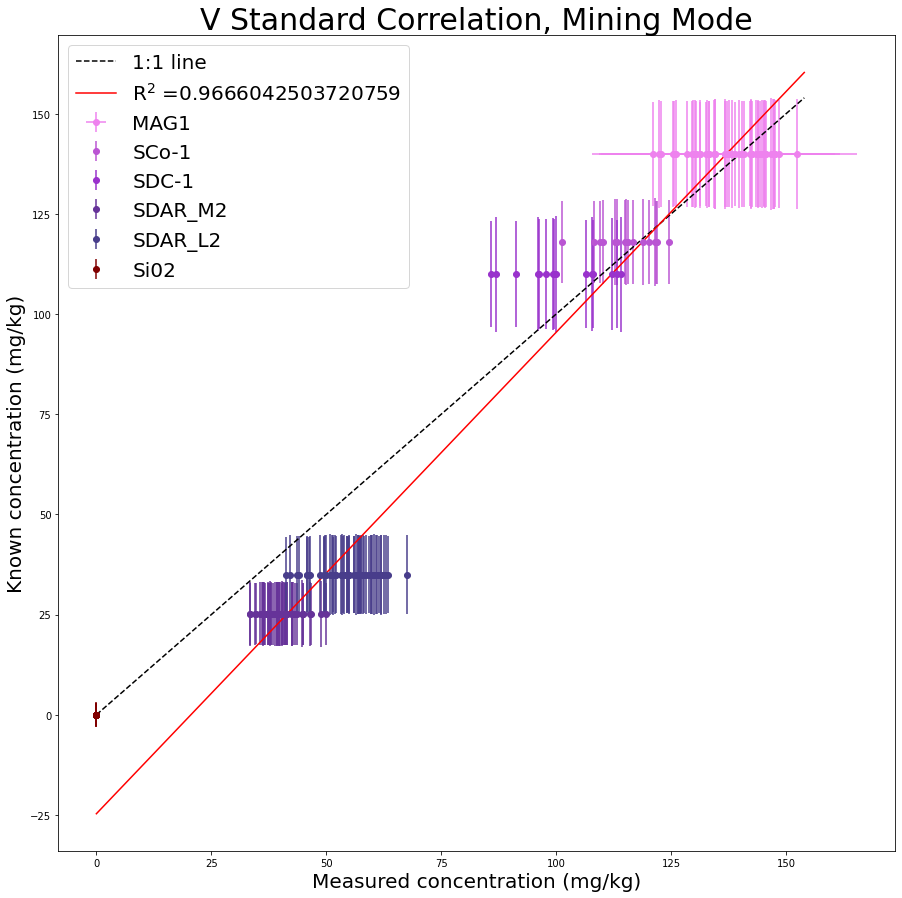

Working on W


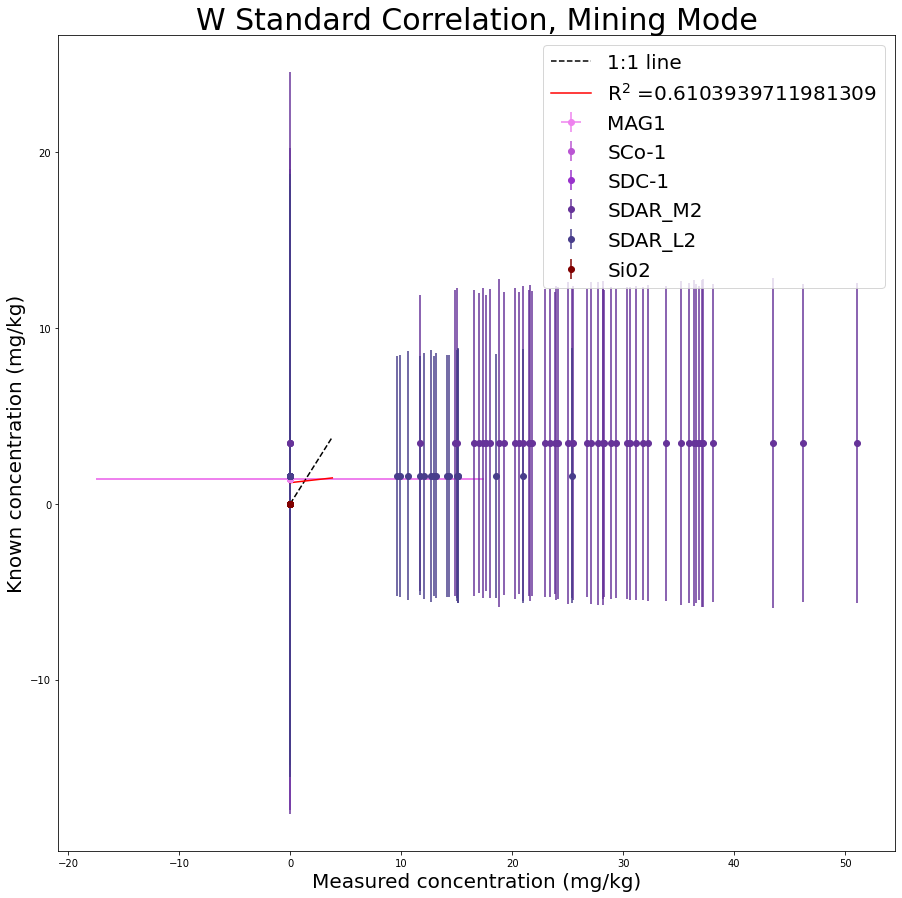

Working on Y


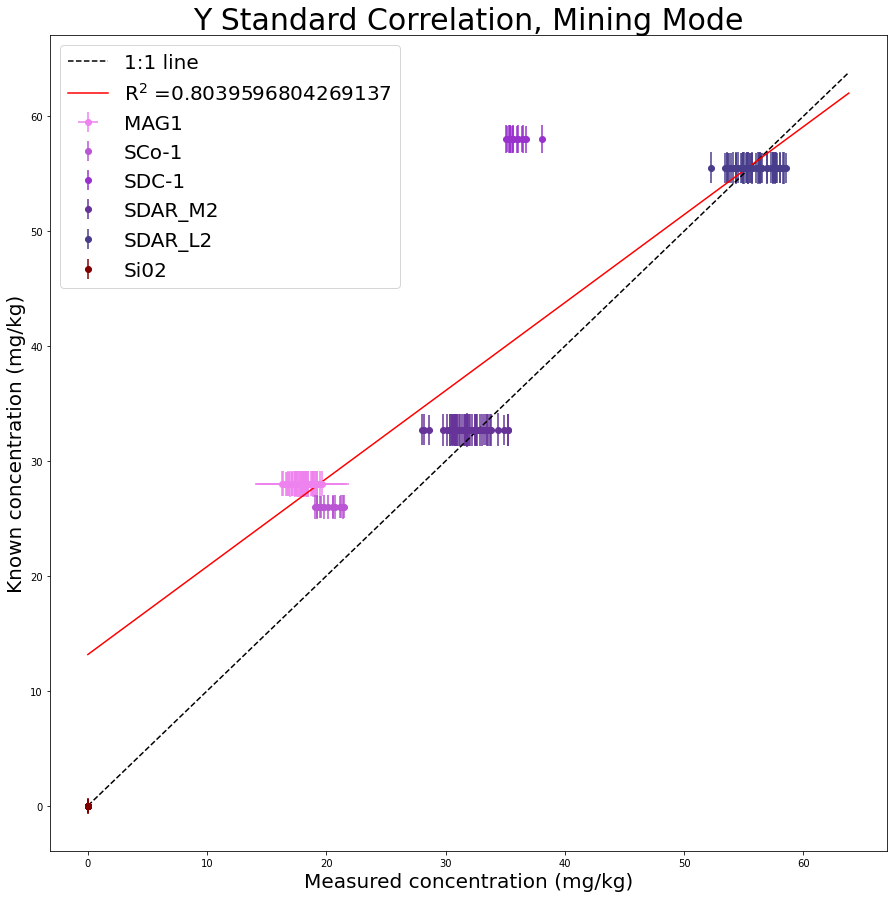

Working on Zn


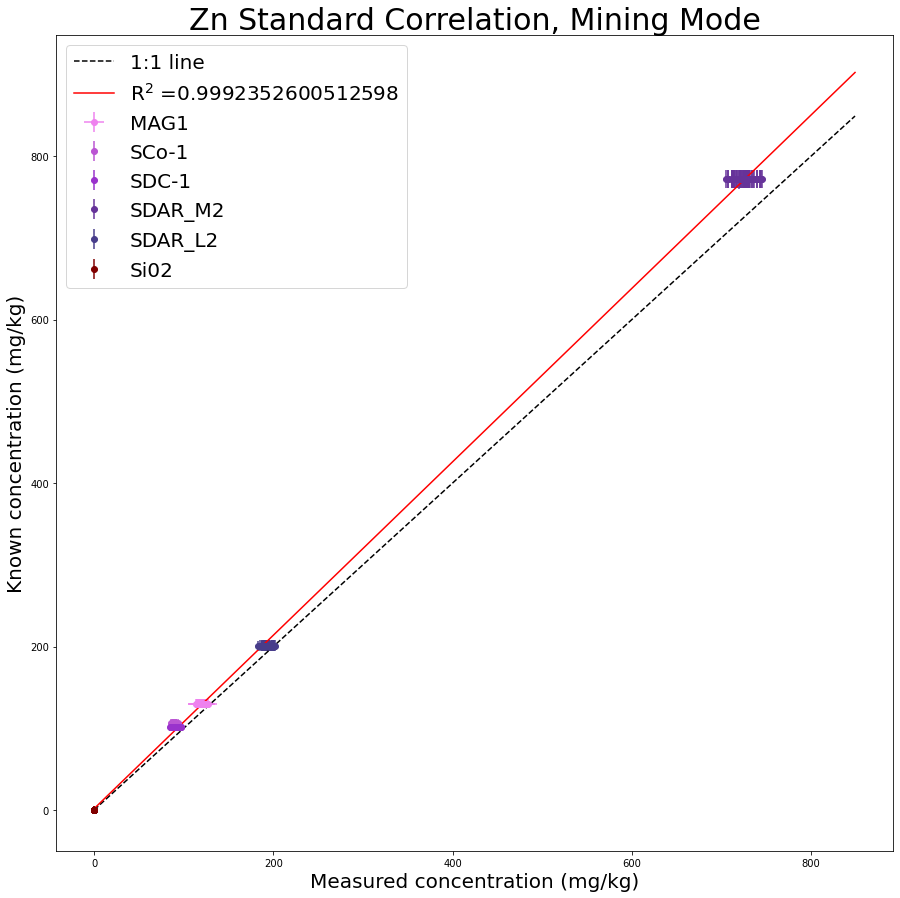

Working on Zr


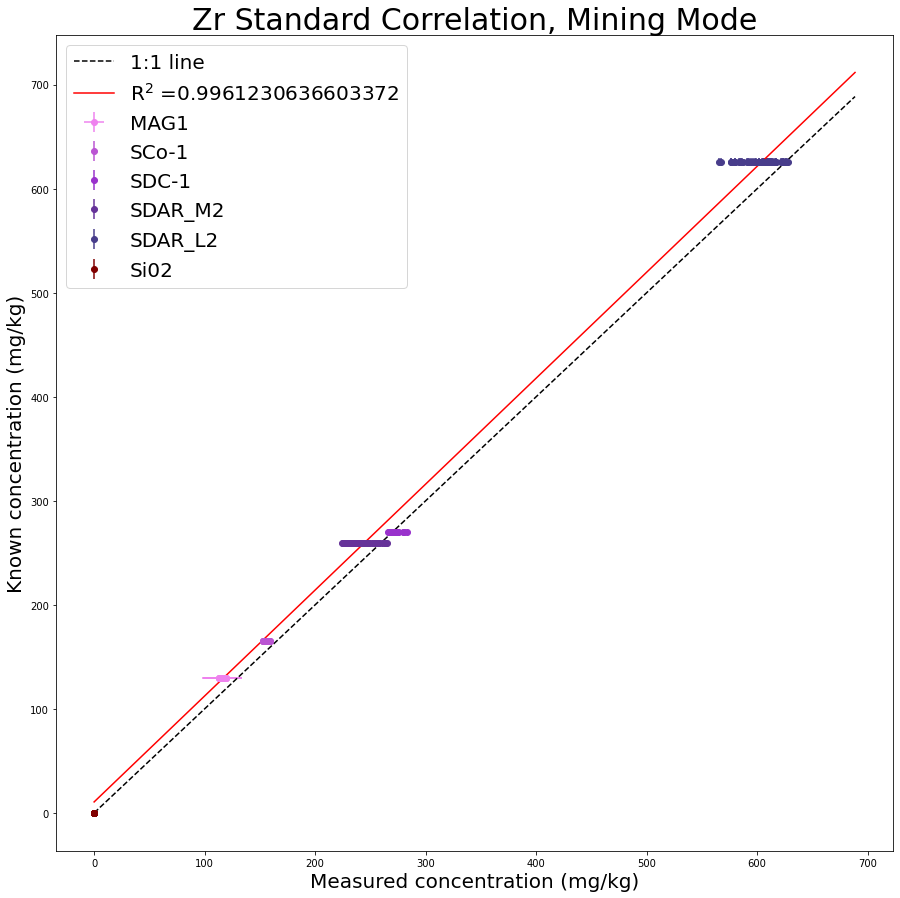

In [10]:
## Loop through the elements of interest

##make a dictionary to be filled during the loop 
elementstats = pd.DataFrame()

for jj in range(0,len(listofelements)): #loop through each element
    element = listofelements[jj]
    elementerr = listofelementerrors[jj]
    print('Working on '+element)

    ##Measured Data
    MAG1_measured = MAG1[element] #this is the element column of that measurement 
    SCO1_measured = SCO1[element]
    SDC1_measured = SDC1[element]
    SDARM2_measured = SDARM2[element]
    SDARL2_measured = SDARL2[element]
    SiO2_measured = SiO2[element] #NOTE: add additional standards here follwing this format, as well as in all additional lines that involve concatenation etc... Make sure to add the known elemental abundances of the standard to the USGS standards compiled file (USGS_STAND.csv)

    ##Standard Data
    MAG1_standards = [USGS.loc[0,element]]*len(MAG1_measured) #locate the row and column of the elemental abundance of each specific standard, and create an array of the same length as the measured standard array. 
    SCO1_standards = [USGS.loc[1,element]]*len(SCO1_measured)
    SDC1_standards = [USGS.loc[2,element]]*len(SDC1_measured)
    SDARM2_standards = [USGS.loc[4,element]]*len(SDARM2_measured)
    SDARL2_standards = [USGS.loc[5,element]]*len(SDARL2_measured)
    Si02_standards = [USGS.loc[3,element]]*len(SiO2_measured)

    combined_measured=np.concatenate([MAG1_measured,SCO1_measured,SDC1_measured,SDARM2_measured,SDARL2_measured]) #unify into a single dataframe.
    combined_standards=np.concatenate([MAG1_standards,SCO1_standards,SDC1_standards,SDARM2_standards,SDARL2_standards])

    data1 = np.array([combined_measured]).reshape((-1, 1)) #reshape to work with LinearRegression() function.

    data2 = np.array(combined_standards)

    model=LinearRegression()  
    model.fit(data1,data2) #implement linear regression model
    r_sq = model.score(data1, data2) #define r2
    
    #isolate slope and intercept of linear regression
    model_inter = model.intercept_
    model_slope = model.coef_[0]
    
    #2Sigma uncertainty on standard measurements= 2 standard deviations of analytical dispersion.
    sig_mag1 = 2*statistics.stdev(MAG1_measured) 
    sig_sco1 = 2*statistics.stdev(SCO1_measured) 
    sig_sdc1 = 2*statistics.stdev(SDC1_measured) 
    sig_sdarm = 2*statistics.stdev(SDARM2_measured) 
    sig_sdarl = 2*statistics.stdev(SDARL2_measured) 
    sig_si02 = 2*statistics.stdev(SiO2_measured) 

    ##find average 2sigma uncertainty across all standards for each element
    comp_sig = [sig_mag1,sig_sco1,sig_sdc1,sig_sdarm,sig_sdarl]
    
    non_zero_val = [float(v) for v in comp_sig if v>0]
    
    sig_average = sum(non_zero_val)/(len(non_zero_val)+.00000000000000000000000000001) #add tiny amount to denominator to avoid divide-by-zero errors while looping
    
     
    
    #Create dataframe with all model equation components and analytical uncertainty approximations for each element.
    data = {'coeff_of_determination':[r_sq], 'slope':[model_slope], 'intercept':[model_inter], '2sig_Avg':[sig_average], '2sig_mag1':[sig_mag1], '2sig_sdarm2':[sig_sdarm], '2sig_sdarl2':[sig_sdarl], }
    df = pd.DataFrame(data, index = [element])
    elementstats = pd.concat([elementstats,df])
    
    
    
    
    
    
    
    ###PLOT MEASUREMENTS, STANDARDS, and FITS FOR EACH ELEMENT * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
    
    plt.figure(figsize=(15,15))
    
    #PLOT MEASUREMENTS VS KNOWN STANDARD CONCENTRATIONS FOR EACH STANDARD
   
    #MAG1_
    plt.errorbar(MAG1_measured,MAG1_standards, yerr=MAG1[elementerr],xerr=sig_average, fmt="o", color='violet', label='MAG1')

    #SCO1_
    plt.errorbar(SCO1_measured,SCO1_standards, yerr=SCO1[elementerr], fmt="o", color='mediumorchid', label='SCo-1')

    #SDC1_
    plt.errorbar(SDC1_measured,SDC1_standards, yerr=SDC1[elementerr], fmt="o", color='darkorchid', label='SDC-1')

    #SDARM2_
    plt.errorbar(SDARM2_measured,SDARM2_standards, yerr=SDARM2[elementerr], fmt="o", color='rebeccapurple', label='SDAR_M2')

    #SDARL2_
    plt.errorbar(SDARL2_measured,SDARL2_standards, yerr=SDARL2[elementerr], fmt="o", color='darkslateblue', label='SDAR_L2')
    
    #SiO2_
    plt.errorbar(SiO2_measured,Si02_standards, yerr=SiO2[elementerr], fmt="o", color='maroon', label='Si02')
   

    #PLOT LINEAR REGRESSION FIT
    
    max_MAG1=np.max(MAG1_standards)#identify maximum values of each standard measurement
    max_SCO1=np.max(SCO1_standards)
    max_SDC1=np.max(SDC1_standards)
    max_SDARM2=np.max(SDARM2_standards)
    max_SDARL2=np.max(SDARL2_standards)
    max_Si02=np.max(Si02_standards)
    comb_max=[max_MAG1, max_SCO1,max_SDC1,max_SDARM2, max_SDARL2]
    standard_max=np.max(comb_max)
   
    
    pp=np.linspace(0,standard_max+(standard_max*.1)) #create an array that extends slightly longer than maximum of all standard max's
    
    #plot 1:1 line
    plt.plot(pp,pp,'k--',label='1:1 line')
    
    #plot regression line
    plt.plot(pp,((pp*model_slope)+model_inter),'r-',label='$\mathregular{R^{2}}$ ='+str(r_sq)+'')

    #plot formatting
    plt.title(str(element)+' Standard Correlation, Mining Mode', fontsize=30)
    plt.legend(fontsize=20)
    plt.xlabel('Measured concentration (mg/kg)',fontsize=20)
    plt.ylabel('Known concentration (mg/kg)', fontsize=20)
   
    #save each figure as a .pdf
    plt.savefig('Figures/StandardCorr/'+element+'_correlation_plot.pdf')
    plt.show()

#save all stats for each element as a .csv
final_stats = elementstats.T   
final_stats.to_csv('OUTPUT_CSV/Standard_Correlation_Statistics/StandardCorrStatsNew.csv')


* * *

<h2><i>OUTPUTS:</h2>

Plots for each element, including a 1:1 line (black dashes), best fit line (red) and standard-measurement scatterplots for each standard are saved. 

All formula components for model linear fits, and calculated average 2-sd dispersions for each element, are compiled and exported in StandardCorrStatsNew.csv. This file is used in the ApplyXRFCorr.ipynb script to apply calibration corrections and additional analytical uncertainties to unknown measurements. 

In [20]:
print(final_stats)#outputs printed on StandardCorrStatsNew.csv

                              Ag            Al         As        Au  \
coeff_of_determination  0.333359      0.428776   0.357222  0.123396   
slope                  -0.003815      1.329450  -0.424716  0.000233   
intercept               0.043710 -36505.098554  14.884965  0.000844   
2sig_mag1               0.000000   6761.654724   1.380225  5.615390   
2sig_sdarm2             4.630383   4418.518607   6.019832  1.451179   
2sig_sdarl2             2.573764   4640.024878   3.345130  1.790731   
2sig_Avg                2.556800   5084.397929   2.977293  2.952433   

                                Ba           Bal        Bi          Ca  \
coeff_of_determination    0.973285      1.000000  0.124664    0.976589   
slope                     1.088037     -0.000000  0.120788    1.326496   
intercept               118.652476      0.000000  0.488217  665.970609   
2sig_mag1                26.175600  18464.929222  0.000000  528.139703   
2sig_sdarm2              22.177244  18207.220169  3.376877  4